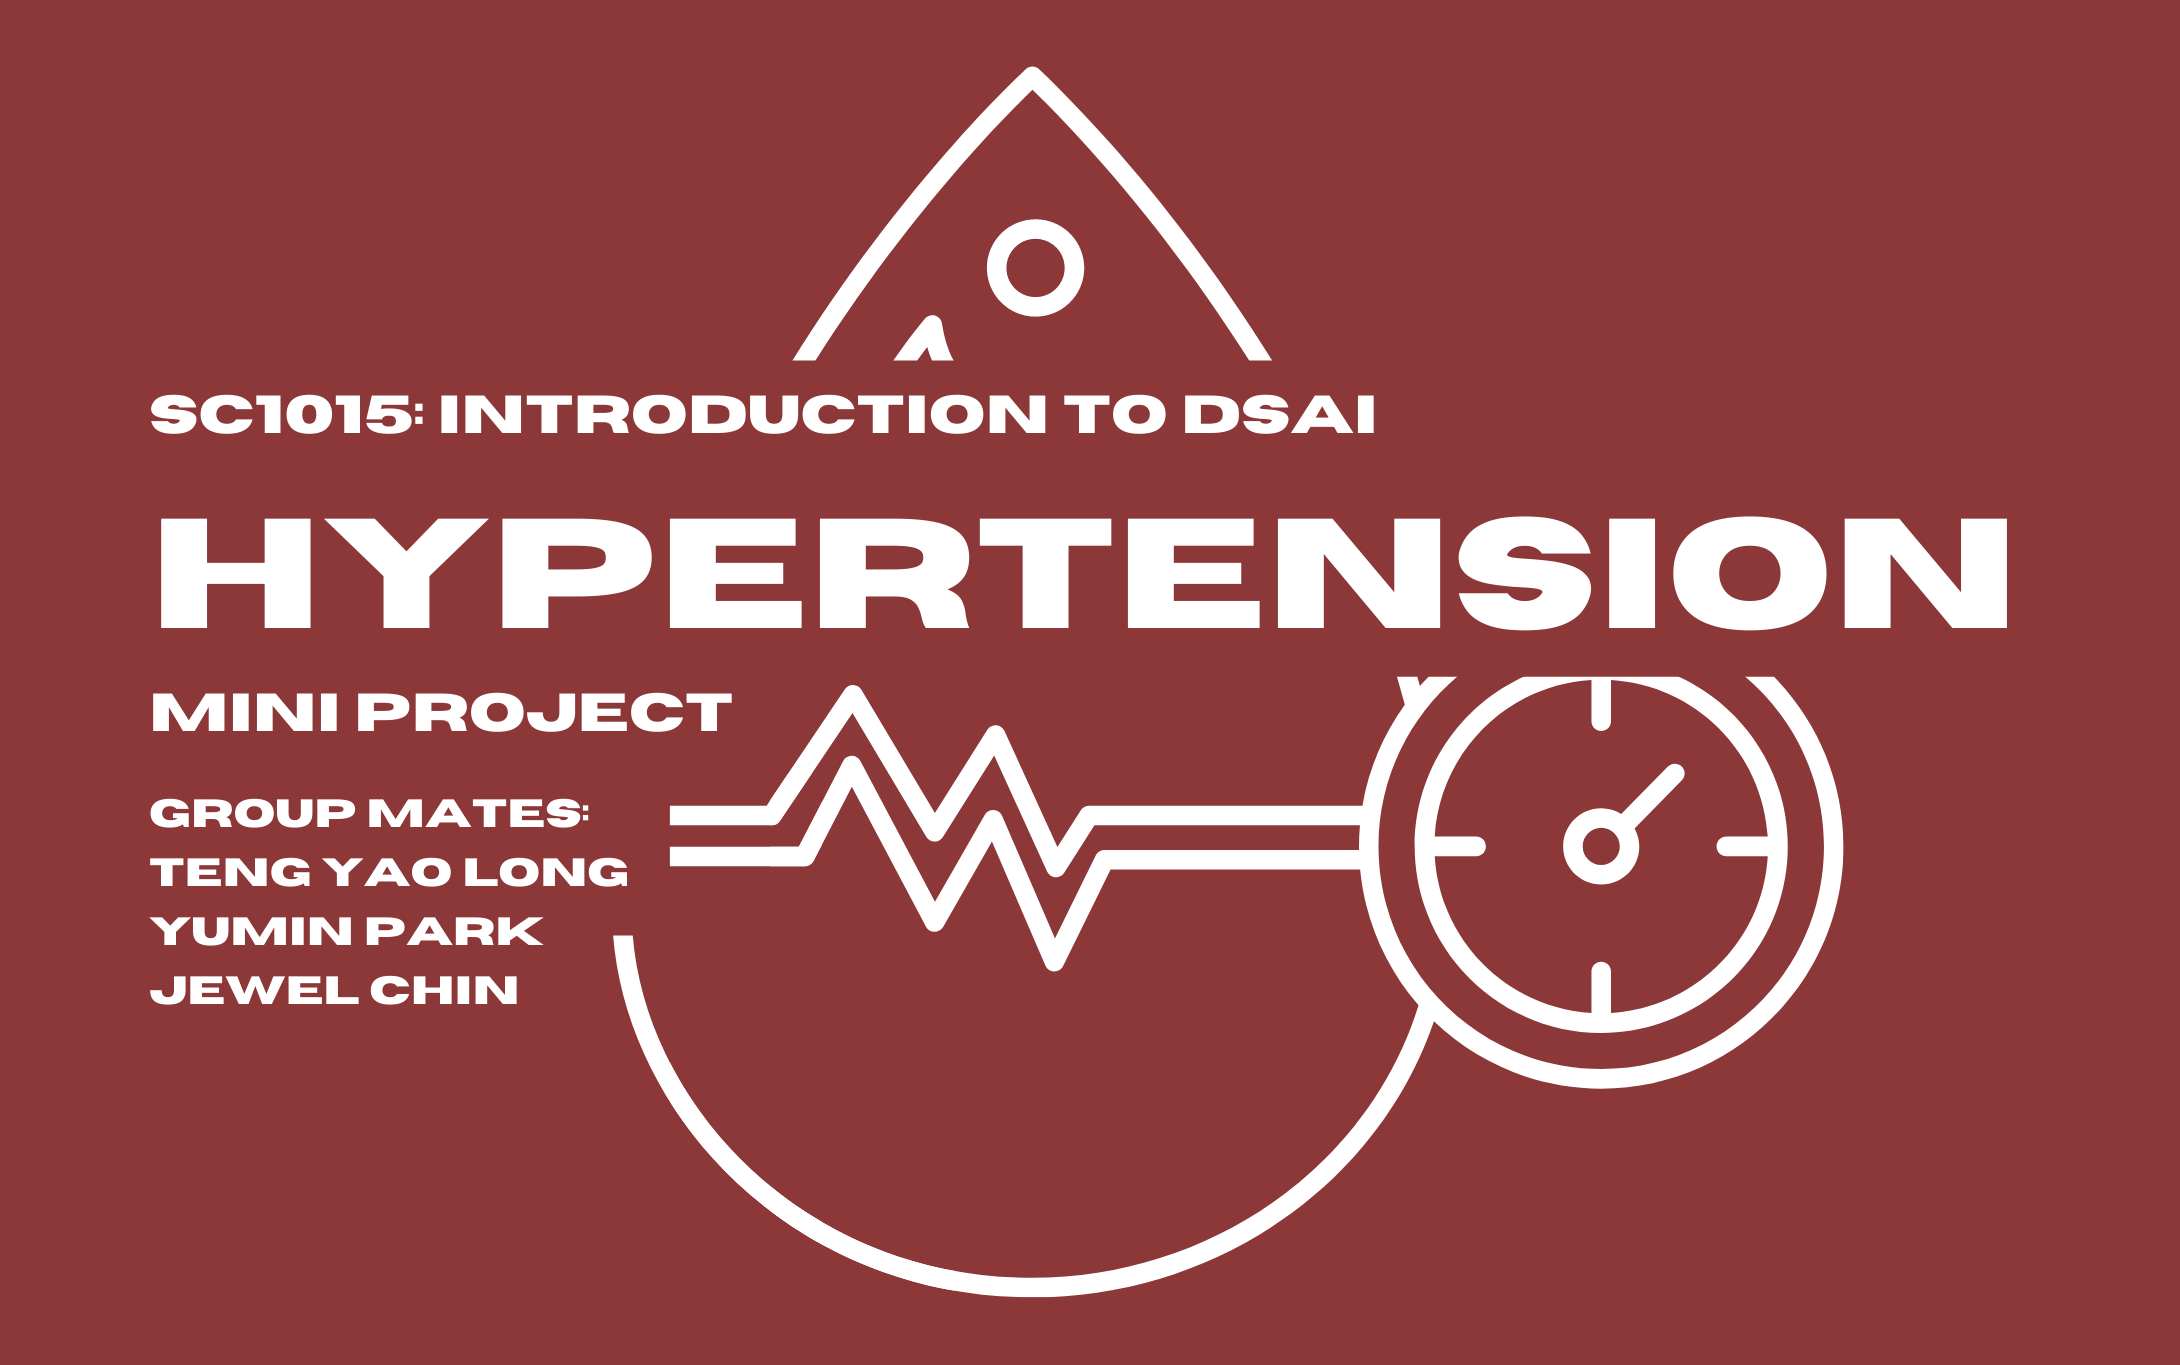

<div>
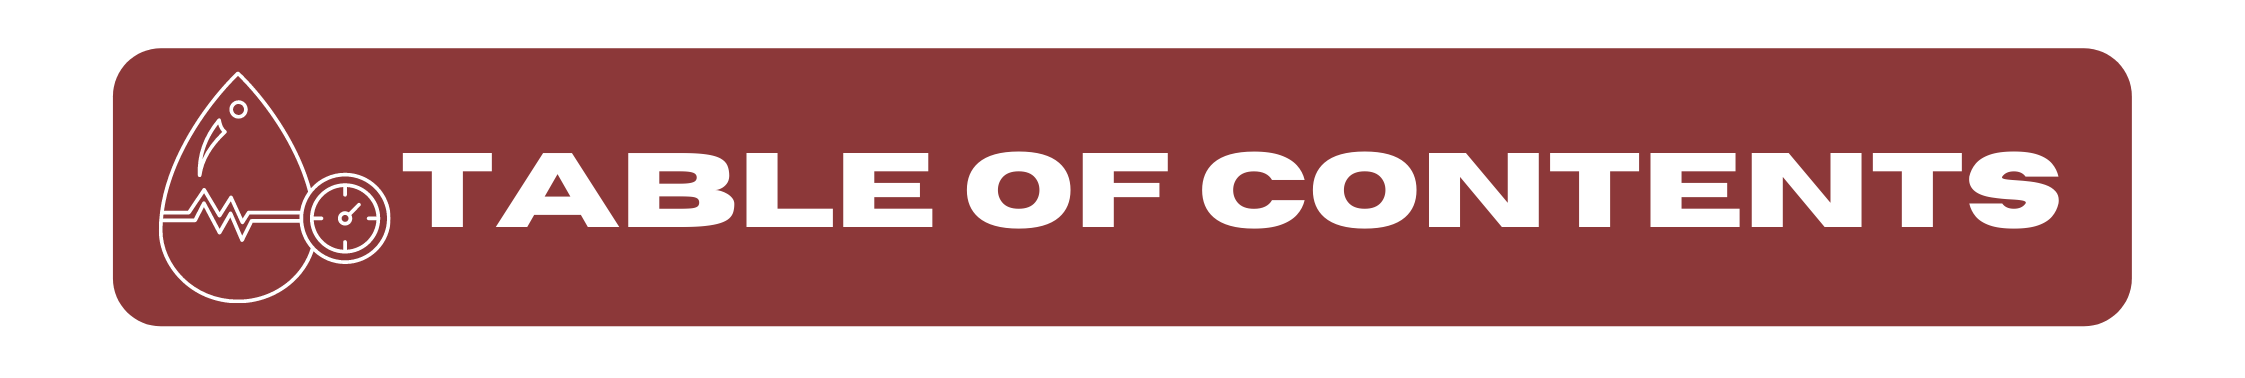
</div>

# 1. <a href='#4'>Introduction</a>
- 1.1 Libraries/Utilities <a href='#1.1'>Link</a>
- 1.2 Data Preprocessing <a href='#1.2'>Link</a>

# 2. <a href='#4'>Exploratory Data Analysis</a>

# 3. <a href='#4'>Data Balancing</a>

#  4. <a href='#4'>Modelling</a>
- 4.1 Logistic Regression <a href='#4.1'>Link</a>
- 4.2 Random Forest <a href='#4.2'>Link</a>
- 4.3 Support Vector Machine <a href='#4.3'>Link</a>
- 4.4 Artificial Neural Network <a href='#4.4'>Link</a>
- 4.5 eXtreme Gradient Boosting Classifier (XGBoost) <a href='#4.5'>Link</a>

# 5. <a href='#5'>Summary</a>

<a id='1'></a>
<div>
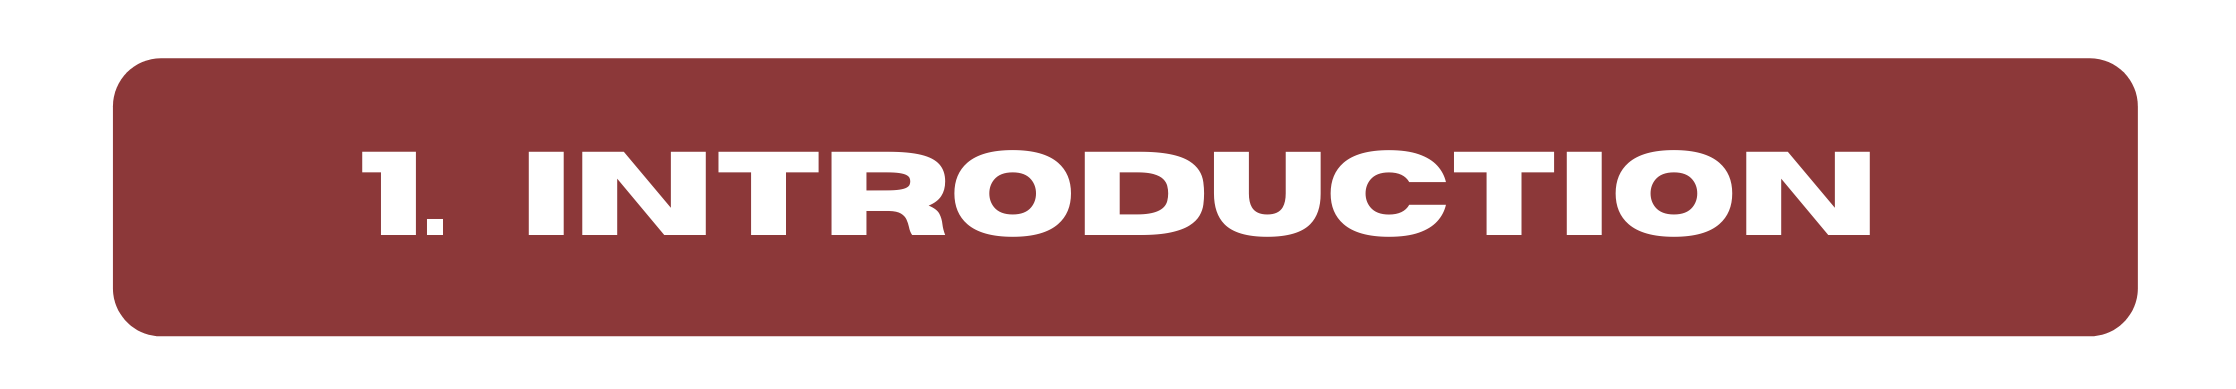
</div>

<a id='1.1'></a>
<div>
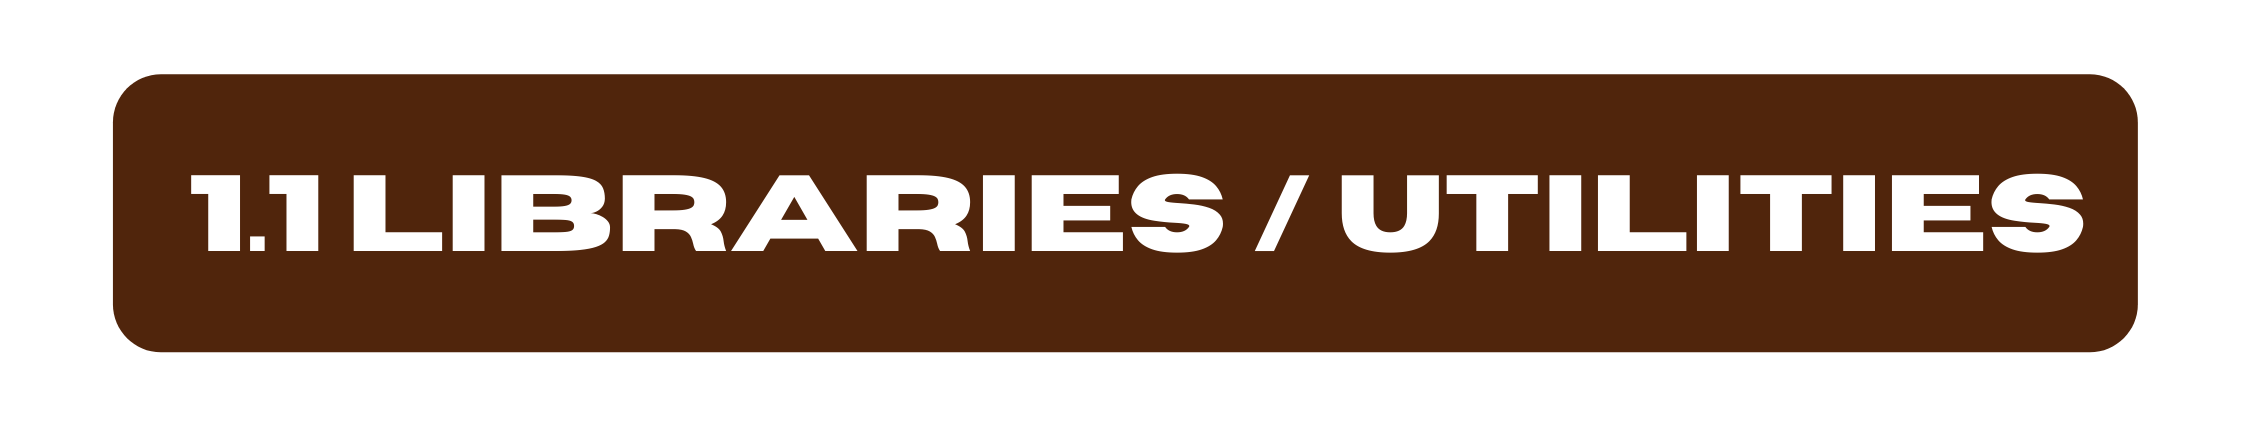
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,f1_score



<a id='1.2'></a>
<div>
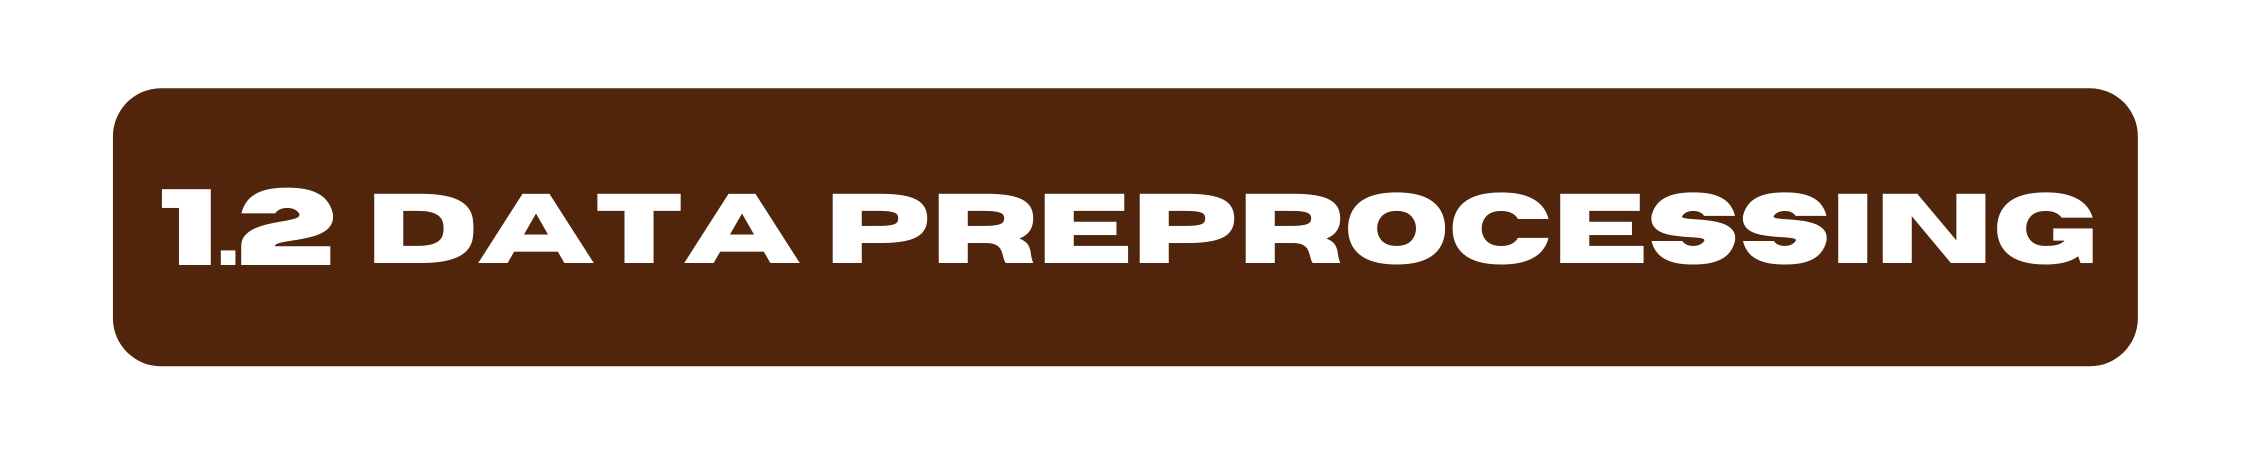
</div>

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['gender_Cat'] = le.fit_transform(df['gender'])
df['married_Cat'] = le.fit_transform(df['ever_married'])
df['worktype_Cat'] = le.fit_transform(df['work_type'])
df['Residence_type_Cat'] = le.fit_transform(df['Residence_type'])


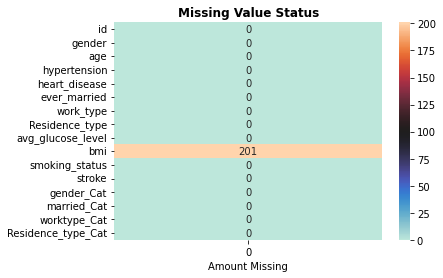

In [5]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='icefire')
ax.set_xlabel('Amount Missing')
plt.show()

<font color='red'><font size="5">As we can see, there are 201 missing data in bmi.</font> 

<a id='2'></a>
<div>
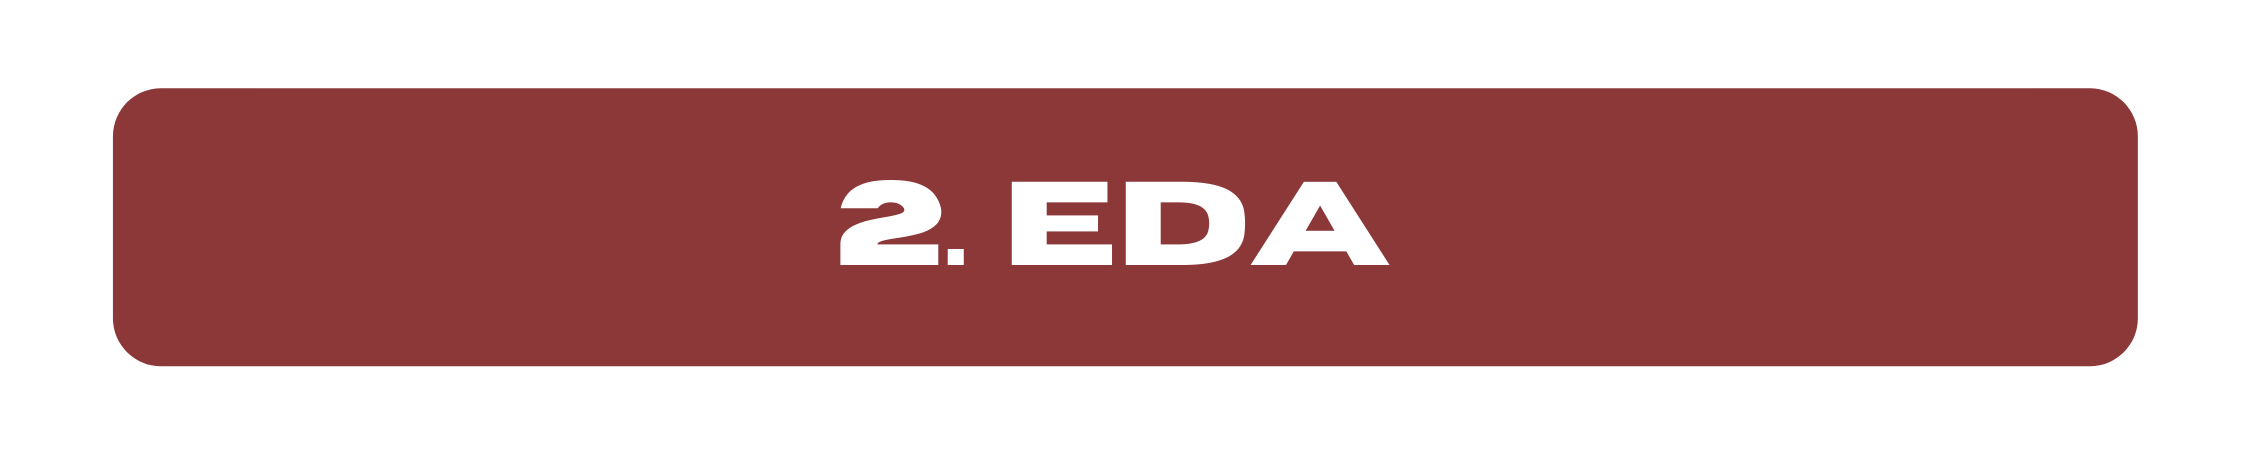
</div>

In [6]:
fig = ex.pie(df,names='hypertension')
fig.update_layout(title='<b>Proportion Of hyptertension Samples<b>')
fig.show()

<font color='red'><font size="5">As to be seen, the dataset is very imbalanced.</font><br />

<font color='red'><font size="5">We will need to deal with this imbalanced dataset later.</font>

# Feature: Smoking status

In [7]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [8]:
len(df)

5110

<font color='blue'><font size="5">Lets drop rows which has unknown smoking status</font>

In [9]:
df = df.drop(df[df['smoking_status']=='Unknown'].index)
len(df)

3566

In [10]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

<font color='blue'><font size="5">Let us combine formerly smoked and smokes to smokes</font>

In [11]:
df.loc[(df['smoking_status'] == 'formerly smoked'), 'smoking_status'] = 'smokes'

In [12]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [13]:
#Encode smoke data
df['smoking_status_Cat'] = le.fit_transform(df['smoking_status'])

# Let us see the correlation matrices

In [14]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

<font color='blue'><font size="5">As to be seen, the numerical data that correlates most to hypertension are age, avg_glucose_level and bmi. <br /><br />
Lets observe hypertension sample distribution based on Bmi and glucose level and
Hypertension Sample Distribution Based On Bmi And Age.

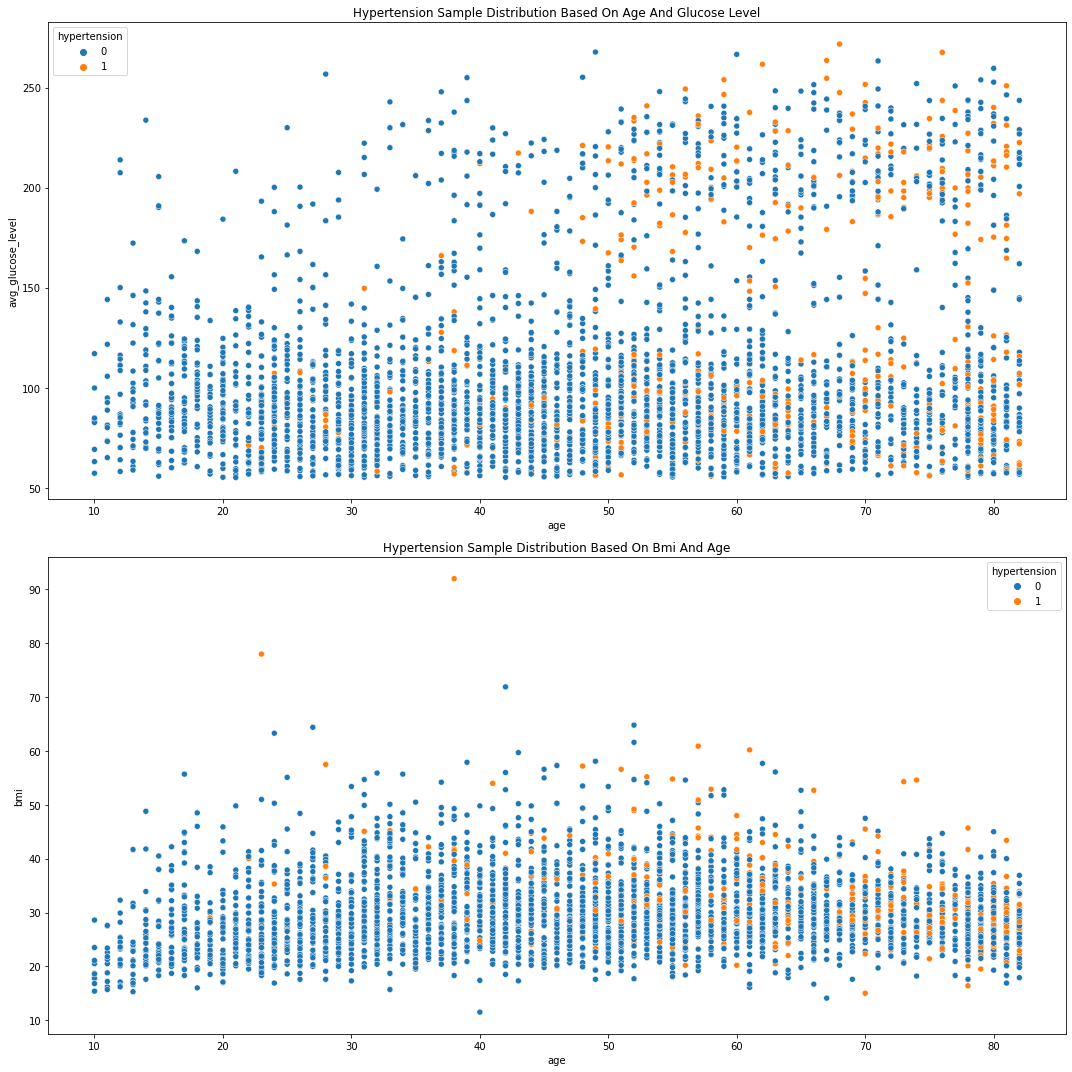

In [15]:
f, axs = plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Hypertension Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['hypertension'])
plt.subplot(2,1,2)
plt.title('Hypertension Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['hypertension'])
plt.tight_layout()
plt.show()

<font color='blue'><font size="5">Age is a very important factor in predicting hypertension

<font color='blue'><font size="5">Remember we had some missing values for bmi? Let us use predict it with a simple regression model with age, gender,  hypertension and avg_glucose_level to fill in the missing value instead of naively inputting it with the mean or median.

In [16]:
bmi_pipe = Pipeline( steps=[
                            ('scaler',StandardScaler()),
                            ('LinReg',LinearRegression())
                              ])
X = df[['age','avg_glucose_level','hypertension','bmi']].copy()


In [17]:

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(bmi_pipe.predict(Missing[['age','avg_glucose_level','hypertension']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3566 non-null   int64  
 1   gender              3566 non-null   object 
 2   age                 3566 non-null   float64
 3   hypertension        3566 non-null   int64  
 4   heart_disease       3566 non-null   int64  
 5   ever_married        3566 non-null   object 
 6   work_type           3566 non-null   object 
 7   Residence_type      3566 non-null   object 
 8   avg_glucose_level   3566 non-null   float64
 9   bmi                 3566 non-null   float64
 10  smoking_status      3566 non-null   object 
 11  stroke              3566 non-null   int64  
 12  gender_Cat          3566 non-null   int64  
 13  married_Cat         3566 non-null   int64  
 14  worktype_Cat        3566 non-null   int64  
 15  Residence_type_Cat  3566 non-null   int64  
 16  smokin

In [19]:
df['bmi'].describe()

count    3566.000000
mean       30.319306
std         7.160341
min        11.500000
25%        25.400000
50%        29.382768
75%        33.900000
max        92.000000
Name: bmi, dtype: float64

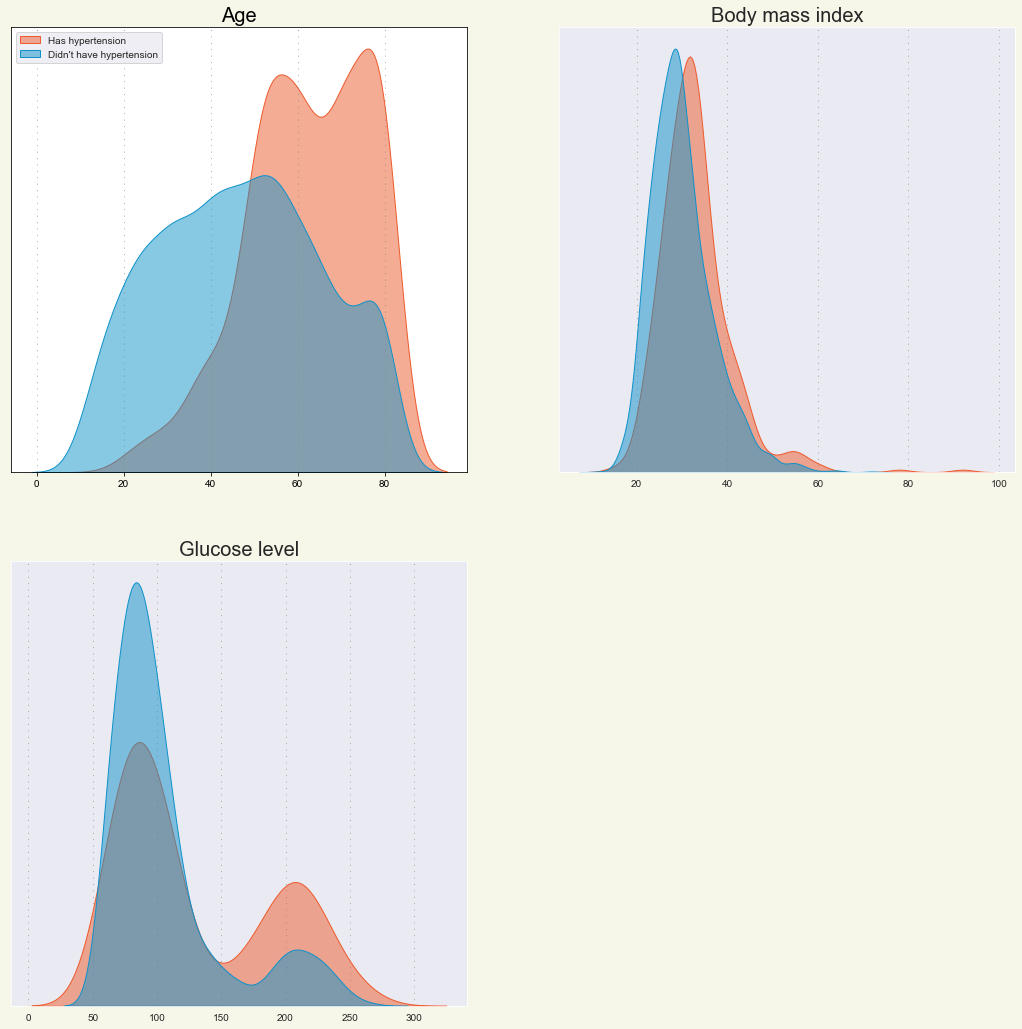

In [20]:
fig = plt.figure(figsize = (18, 18))
fig.patch.set_facecolor('#f6f6e9')

plt.subplot(221)
sns.set_style("dark")
plt.title('Age', size = 20)
sns.kdeplot(df.query('hypertension == 1')['age'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['age'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('hypertension == 1')['bmi'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['bmi'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.subplot(223)
plt.title('Glucose level', size = 20)
sns.kdeplot(df.query('hypertension == 1')['avg_glucose_level'], color = '#ed5b2d', shade = True, label = 'Has hypertenson', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['avg_glucose_level'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.show()

<font color='blue'><font size="5">
KDE plot insights
1) above the age of 40, one is very likely to have hypertension especially above 50s.

   possible relationship between age and hypertension.

2) BMI cannot tell anything (explore more later)

3) glucose level < 140 is where one is very likely to not have hypertension. note: this is the range for a normal, healthy person.

   glucose level > 150 is where one is more likely to have hypertension. at around glucose level > 200 is where one is more likely to have hypertension. 
 note: this is the range where one is considered diabetic. 

   possible relationship between glucose levels and hypertension.



In [21]:
stroke = df.copy()
# Create age groups
stroke['age_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 2] < 2:
        stroke.iloc[i, 17] = 'baby'
    elif stroke.iloc[i, 2] < 17 and stroke.iloc[i, 2] >= 2:
        stroke.iloc[i, 17] = 'child'
    elif stroke.iloc[i, 2] < 30 and stroke.iloc[i, 2] >= 17:
        stroke.iloc[i, 17] = 'young adults'
    elif stroke.iloc[i, 2] < 60 and stroke.iloc[i, 2] >= 30:
        stroke.iloc[i, 17] = 'middle-aged adults'
    elif stroke.iloc[i, 2] < 80 and stroke.iloc[i, 2] >= 60:
        stroke.iloc[i, 17] = 'old-aged adults'
    else:
        stroke.iloc[i, 17] = 'long-lived'
        
# Create bmi groups
stroke['bmi_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 9] < 18.5:
        stroke.iloc[i, 13] = 'Underweight'
    elif stroke.iloc[i, 9] < 25.0 and stroke.iloc[i, 9] >= 18.5:
        stroke.iloc[i, 18] = 'Normal weight'
    elif stroke.iloc[i, 9] < 30.0 and stroke.iloc[i, 9] >= 25.0:
        stroke.iloc[i, 18] = 'Overweight'
    else:
        stroke.iloc[i, 18] = 'Obese'
        
# Create glucose groups
stroke['glucose_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 8] < 100:
        stroke.iloc[i, 19] = 'Normal'
    elif stroke.iloc[i, 8] >= 100 and stroke.iloc[i, 8] < 125:
        stroke.iloc[i, 19] = 'Prediabetes'
    else:
        stroke.iloc[i, 19] = 'Diabetes'

In [22]:
# Grouping by categorical features
dst_st_age = stroke.groupby(['age_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
stroke1 = stroke.groupby(['stroke', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
heart = stroke.groupby(['heart_disease', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
marry = stroke.groupby(['ever_married', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
work = stroke.groupby(['work_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
residence = stroke.groupby(['Residence_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
glucose_group = stroke.groupby(['glucose_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
bmi_group = stroke.groupby(['bmi_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
smoking = stroke.query('smoking_status != "Unknown"').groupby(['smoking_status', 'hypertension']).agg({'hypertension': 'count'})\
.rename(columns = {'hypertension': 'count'}).reset_index()

# Create percent column for data frames
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if i < len(data.index)-1:
            if data.iloc[i, 0] == data.iloc[i+1, 0]:
                data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
            elif data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
        else:
            if data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
            
percent(dst_st_age)
percent(stroke1)
percent(heart)
percent(marry)
percent(work)
percent(residence)
percent(glucose_group)
percent(bmi_group)
percent(smoking)


In [23]:
stroke.head(20)

id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
14   5317  Female  79.0             0              1          Yes   
15  58202  Female  50.0             1              0          Yes   
16  56112    Male  64.0             0              1          Yes   
17  34120    Male  75.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
20  70630  Female  71.0             0              0          Yes   
21  13861  Female  52.0             1              0          Yes   
22  68794  Female  79.0             0              0          Yes   
24   4219    Male  71.0             0              0          Yes   

        work_type Residence_type  avg_glucose_level        bmi smoking_status  \
0         Private          Urban             228.69  36.600000         smokes   
1   Self-employed          Rural             202.21  32.031278   never smoked   
2         Private          Rural             105.92  32.500000   never smoked   
3         Private          Urban             171.23  34.400000         smokes   
4   Self-employed          Rural             174.12  24.000000   never smoked   
5         Private          Urban             186.21  29.000000         smokes   
6         Private          Rural              70.09  27.400000   never smoked   
7         Private          Urban              94.39  22.800000   never smoked   
10        Private          Rural              80.43  29.700000   never smoked   
11       Govt_job          Rural             120.46  36.800000         smokes   
12        Private          Urban             104.51  27.300000         smokes   
14        Private          Urban             214.09  28.200000   never smoked   
15  Self-employed          Rural             167.41  30.900000   never smoked   
16        Private          Urban             191.61  37.500000         smokes   
17        Private          Urban             221.29  25.800000         smokes   
18        Private          Urban              89.22  37.800000   never smoked   
20       Govt_job          Rural             193.94  22.400000         smokes   
21  Self-employed          Urban             233.29  48.900000   never smoked   
22  Self-employed          Urban             228.70  26.600000   never smoked   
24        Private          Urban             102.87  27.200000         smokes   

    stroke  gender_Cat married_Cat  worktype_Cat  Residence_type_Cat  \
0        1           1           1             2                   1   
1        1           0           1             3                   0   
2        1           1           1             2                   0   
3        1           0           1             2                   1   
4        1           0           1             3                   0   
5        1           1           1             2                   1   
6        1           1           1             2                   0   
7        1           0           0             2                   1   
10       1           0           1             2                   0   
11       1           0           1             0                   0   
12       1           0           1             2               

In [24]:
dst_st_age

age_group  hypertension  count  percent
0               child             0    139    100.0
1          long-lived             0    106     70.2
2          long-lived             1     45     29.8
3  middle-aged adults             0   1608     90.2
4  middle-aged adults             1    175      9.8
5     old-aged adults             0    749     77.6
6     old-aged adults             1    216     22.4
7        young adults             0    518     98.1
8        young adults             1     10      1.9

In [25]:
dst_st_age.iloc[[2,4,6,8], 1] = "Had hypertension"
dst_st_age.iloc[[0,1,3,5,7], 1] = "Didn't have hypertension"

stroke1.iloc[[0,1], 0] = 'No stroke'
stroke1.iloc[[2,3], 0] = 'Stroke'

heart.iloc[[0,1], 0] = 'No heart diseases'
heart.iloc[[2,3], 0] = 'Heart diseases'

Text(0, 0.5, 'Proportion of Hypertension')

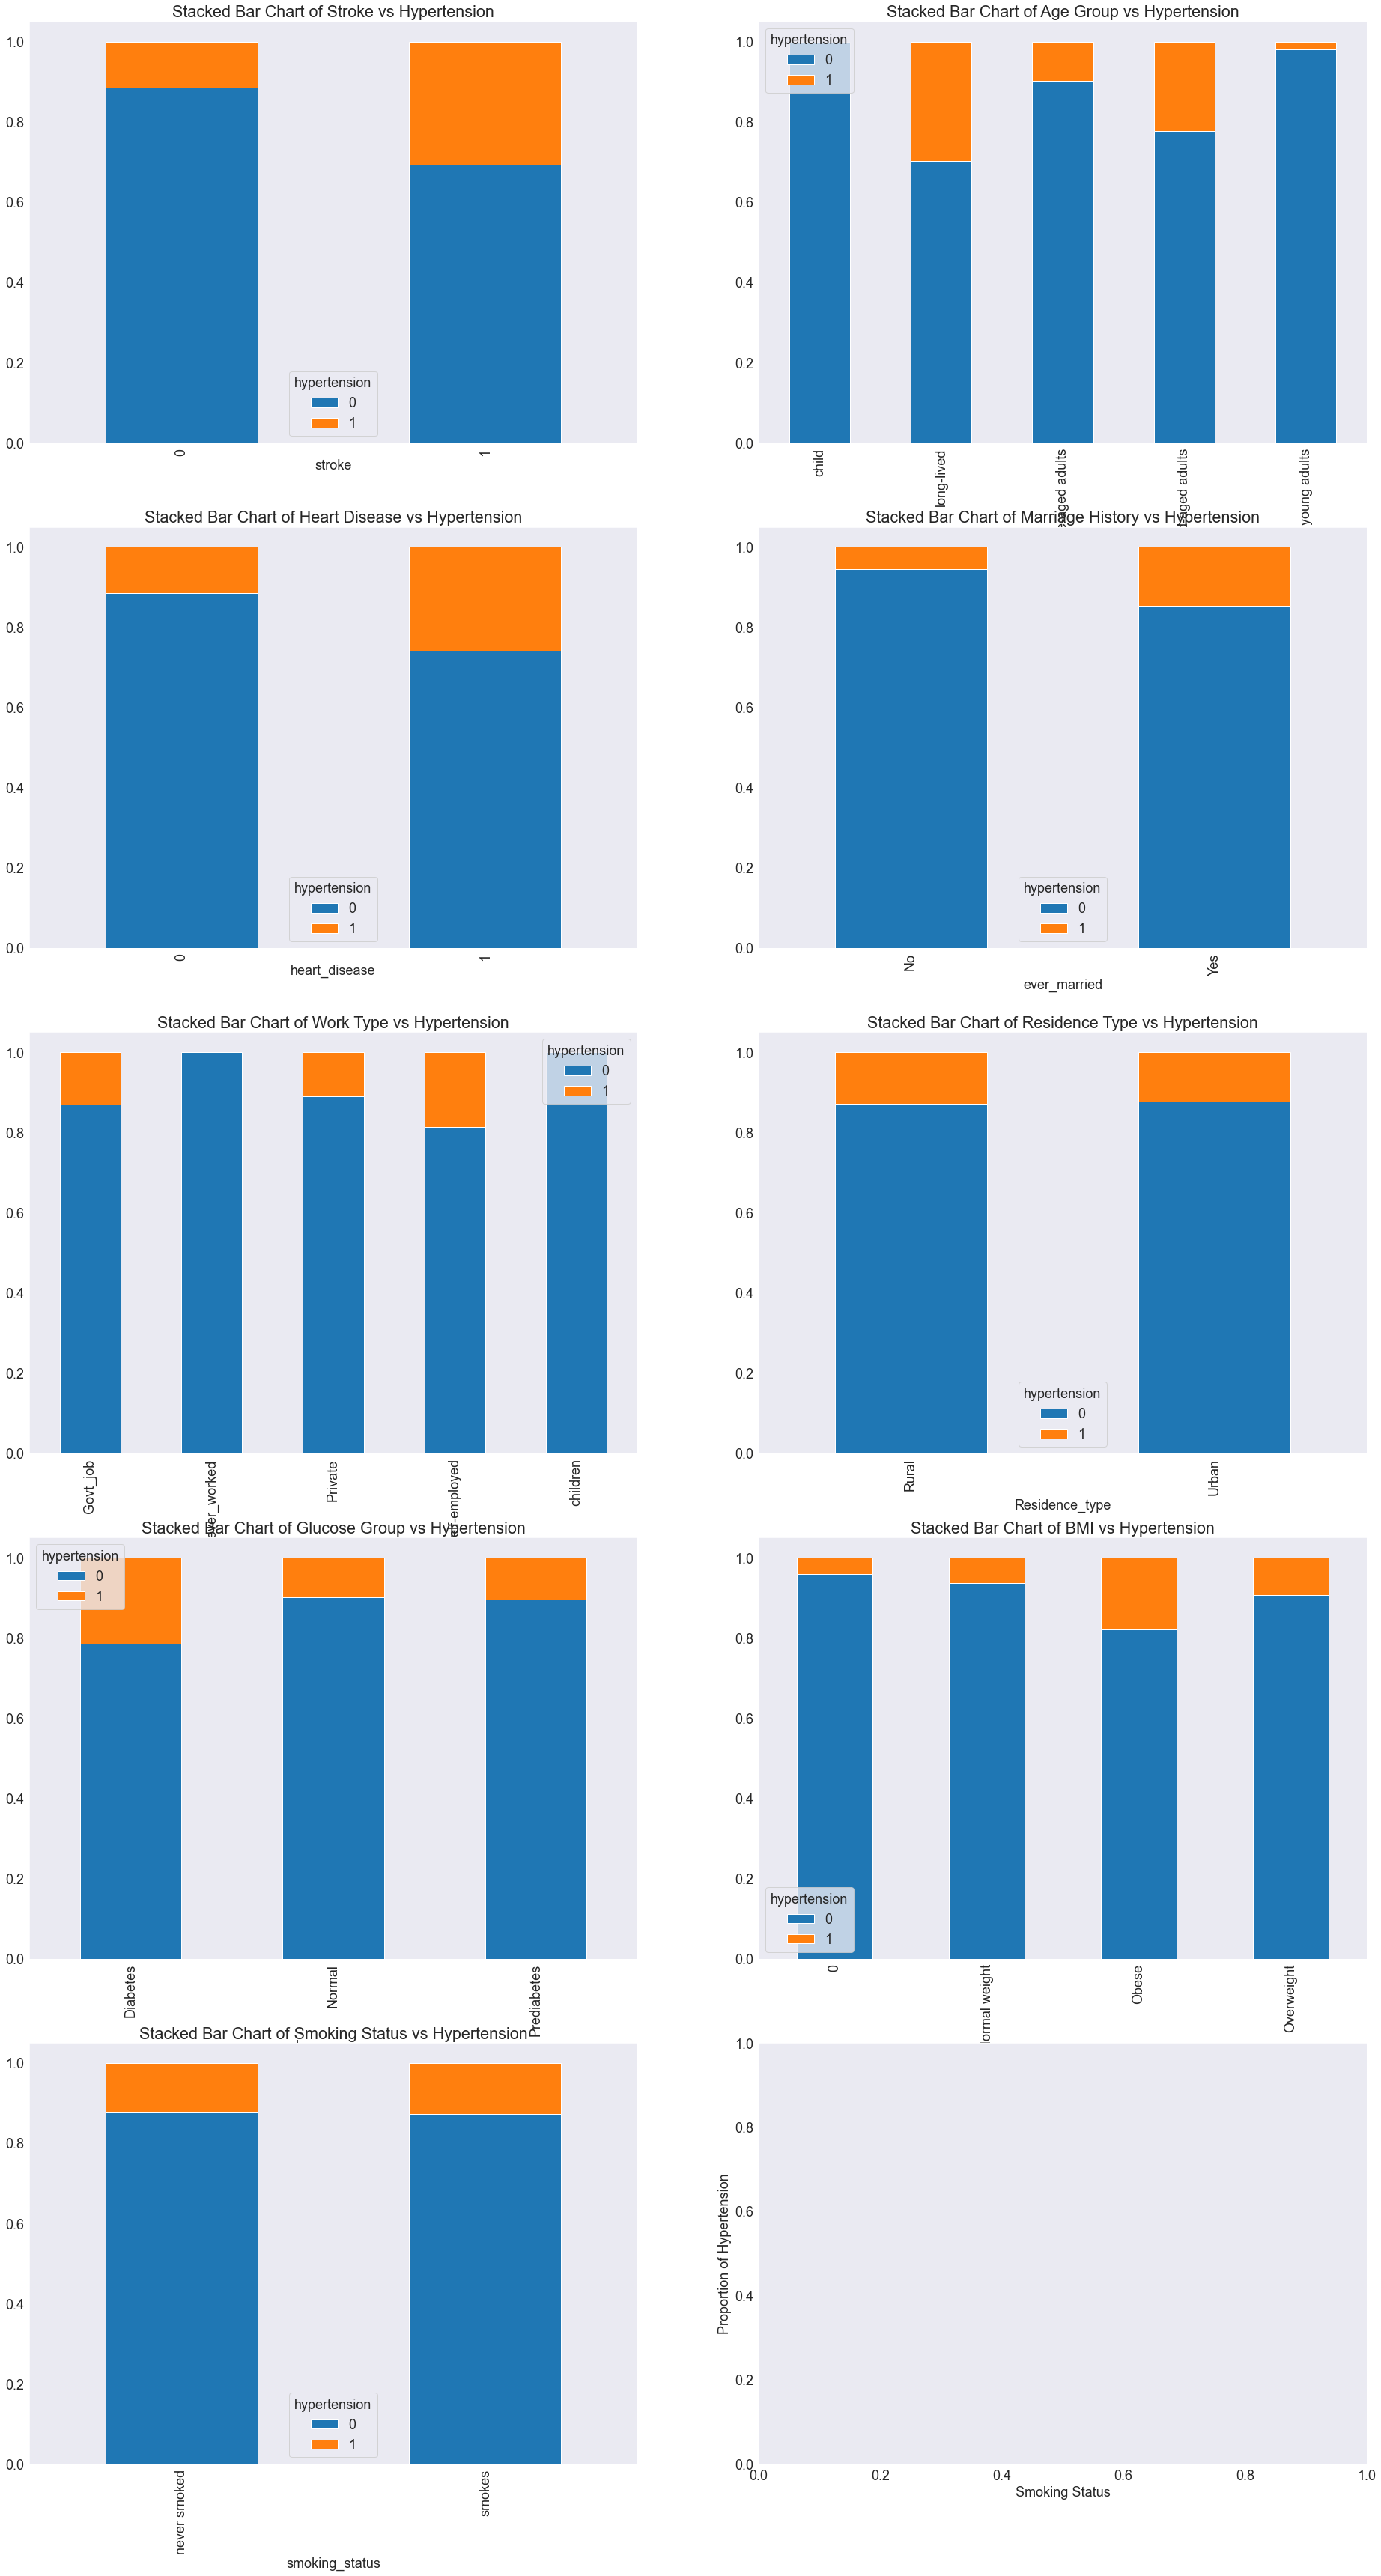

In [26]:

plt.rcParams.update({'font.size': 18})
ax.tick_params(labelrotation=45)
fig.tight_layout()


f, axes = plt.subplots(5, 2, figsize=(32,60))
table=pd.crosstab(stroke.stroke,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[0,0])
axes[0,0].set_title('Stacked Bar Chart of Stroke vs Hypertension')
plt.xlabel('Stroke')
plt.ylabel('Proportion of Hypertension')



table=pd.crosstab(stroke.age_group,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[0,1])
axes[0,1].set_title('Stacked Bar Chart of Age Group vs Hypertension')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Hypertension')

table=pd.crosstab(stroke.heart_disease,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[1,0])
axes[1,0].set_title('Stacked Bar Chart of Heart Disease vs Hypertension')
plt.xlabel('Heart Disease')
plt.ylabel('Proportion of Hypertension')

table=pd.crosstab(stroke.ever_married,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[1,1])
axes[1,1].set_title('Stacked Bar Chart of Marriage History vs Hypertension')
plt.xlabel('Ever Married')
plt.ylabel('Proportion of Hypertension')

table=pd.crosstab(stroke.work_type,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[2,0])
axes[2,0].set_title('Stacked Bar Chart of Work Type vs Hypertension')
plt.xlabel('Work Type')
plt.ylabel('Proportion of Hypertension')


table=pd.crosstab(stroke.Residence_type,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[2,1])
axes[2,1].set_title('Stacked Bar Chart of Residence Type vs Hypertension')
plt.xlabel('Residence Type')
plt.ylabel('Proportion of Hypertension')


table=pd.crosstab(stroke.glucose_group,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[3,0])
axes[3,0].set_title('Stacked Bar Chart of Glucose Group vs Hypertension')
plt.xlabel('Glucose Group')
plt.ylabel('Proportion of Hypertension')


table=pd.crosstab(stroke.bmi_group,stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[3,1])
axes[3,1].set_title('Stacked Bar Chart of BMI vs Hypertension')
plt.xlabel('BMI  Group')
plt.ylabel('Proportion of Hypertension')


table=pd.crosstab(stroke.smoking_status, stroke.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[4,0])
axes[4,0].set_title('Stacked Bar Chart of Smoking Status vs Hypertension')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of Hypertension')


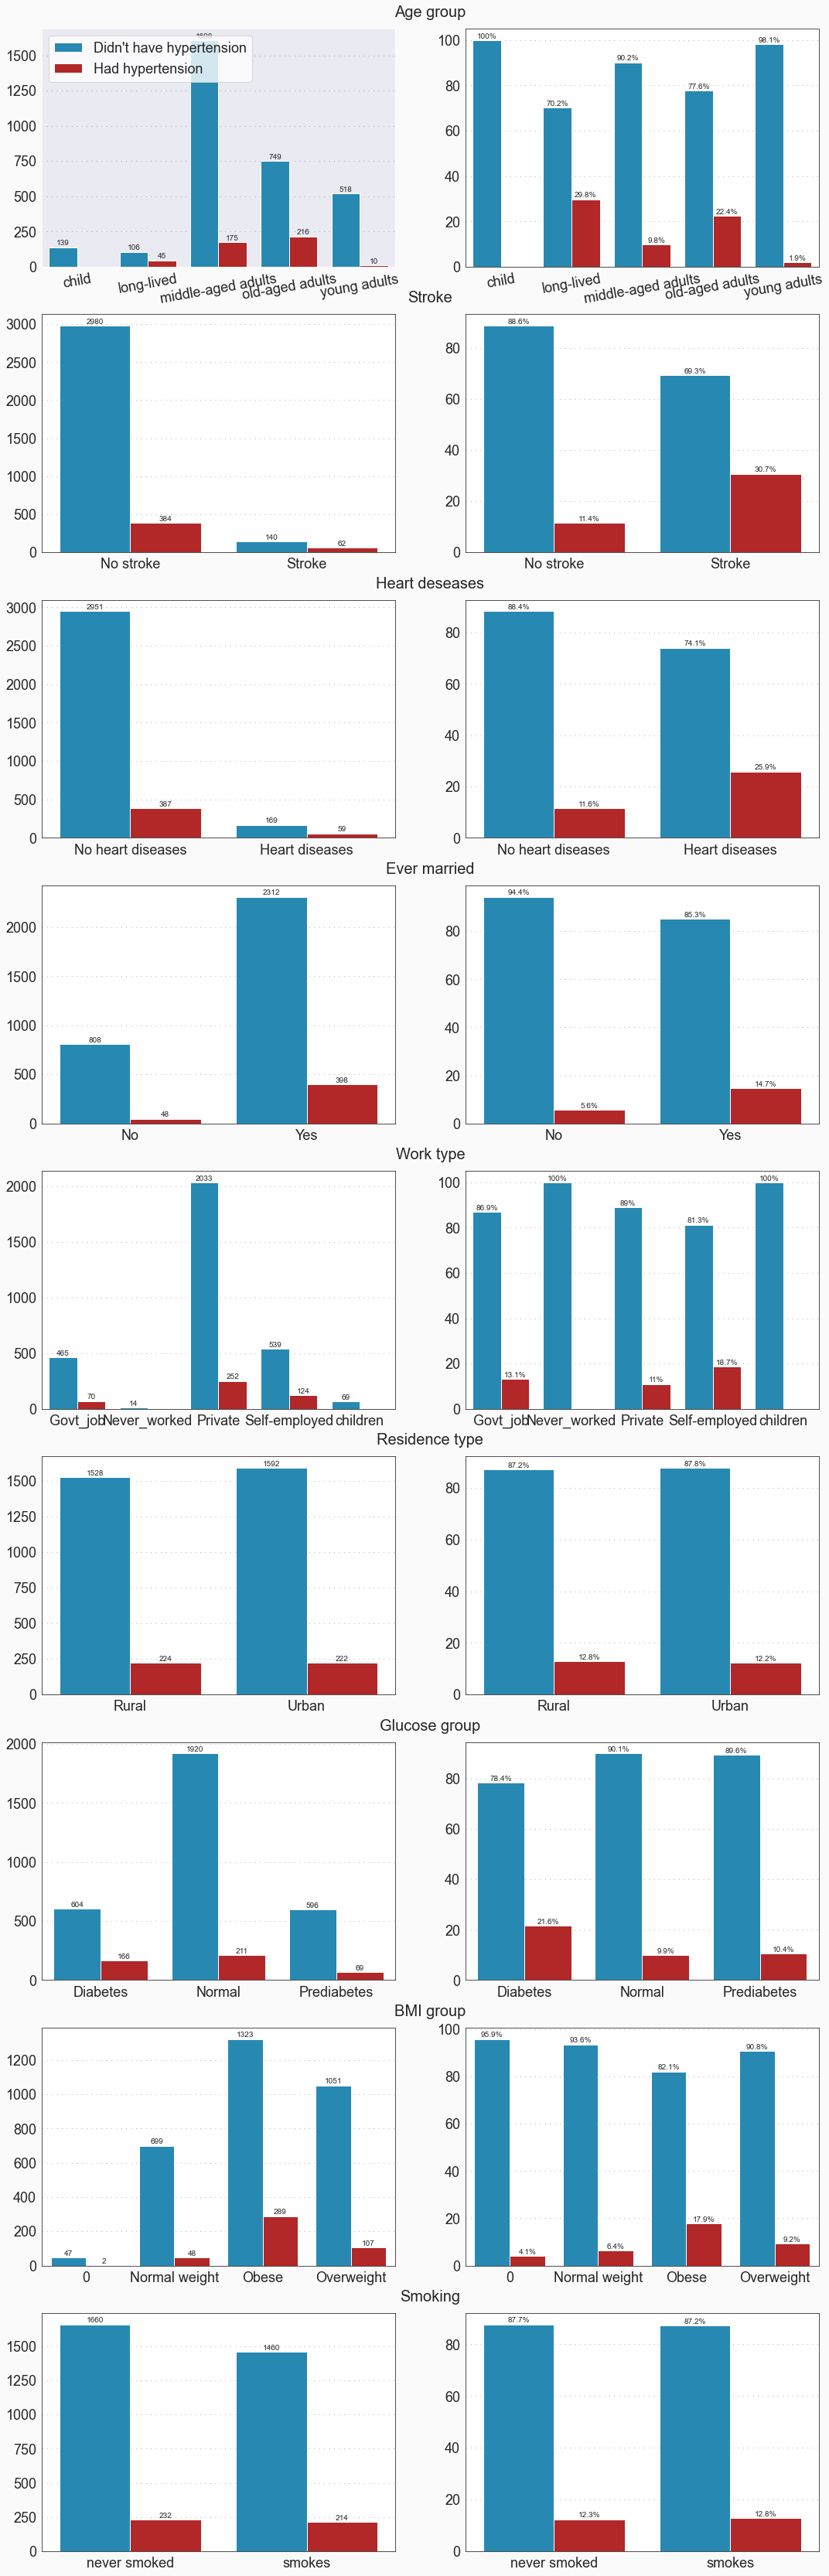

In [27]:

fig = plt.figure(figsize = (18, 60))
fig.patch.set_facecolor('#fafafa')

plt.subplot(921)
sns.set_style('white')
plt.title('Age group', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['count'], hue = dst_st_age['hypertension'], palette = ['#1092c9','#c91010',])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper left')

plt.subplot(922)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a2 = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['percent'], hue = dst_st_age['hypertension'], palette = ['#1092c9','#c91010',])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(923)
sns.set_style('white')
plt.title('Stroke', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b = sns.barplot(data = stroke1, x = stroke1['stroke'], y = stroke1['count'], hue = stroke1['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(924)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b2 = sns.barplot(data = stroke1, x = stroke1['stroke'], y = stroke1['percent'], hue = stroke1['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(925)
sns.set_style('white')
plt.title('Heart deseases', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['count'], hue = heart['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(926)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c2 = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['percent'], hue = heart['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(927)
sns.set_style('white')
plt.title('Ever married', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d = sns.barplot(data = marry, x = marry['ever_married'], y = marry['count'], hue = marry['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(928)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d2 = sns.barplot(data = marry, x = marry['ever_married'], y = marry['percent'], hue = marry['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(929)
sns.set_style('white')
plt.title('Work type', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e = sns.barplot(data = work, x = work['work_type'], y = work['count'], hue = work['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,10)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e2 = sns.barplot(data = work, x = work['work_type'], y = work['percent'], hue = work['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,11)
sns.set_style('white')
plt.title('Residence type', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['count'], hue = residence['hypertension'], palette = ['#1092c9','#c91010'])

plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
plt.subplot(9,2,12)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f2 = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['percent'], hue = residence['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,13)
sns.set_style('white')
plt.title('Glucose group', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['count'], hue = glucose_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g2 = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['percent'], hue = glucose_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,15)
sns.set_style('white')
plt.title('BMI group', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['count'], hue = bmi_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,16)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h2 = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['percent'], hue = bmi_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,17)
sns.set_style('white')
plt.title('Smoking', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['count'], hue = smoking['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,18)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j2 = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['percent'], hue = smoking['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

# add annotations
for i in [a,b,c,d,e,f,g,h,j]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

for i in [a2,b2,c2,d2,e2,f2,g2,h2,j2]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
        
plt.show()

<AxesSubplot:xlabel='hypertension', ylabel='count'>

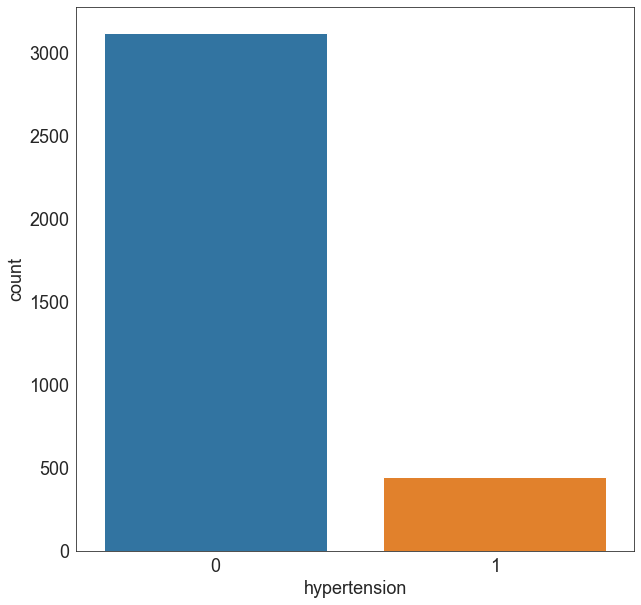

In [28]:
fig,axes = plt.subplots(figsize = (10,10))
sns.set_style('darkgrid')
sns.countplot(ax=axes,data=df,x='hypertension')

Large proportion of data has no hypertension, need to stratify during model testing

based on barplots
1) age group
if fall under long-lived, the likeliness of having hypertension is high
the likeliness of having hypertension is low for all other age groups, though slightly higher for old-aged adults compared to middle-aged adults.

there is correlation between age and hypertension. However, this can still happen to young adults given available data.

2)stroke and heart diseases
there is strong correlation between stroke and heartdiseases and hypertension. However, this can still happen to those who did not have stroke or heart diseases given available data.

3)ever married
there is (weak?) correlation between marriage status and hypertension.
if ever married, higher risk of hypertension.

4)work type
percentages for govt job, private and selfemployed are very similar.
note that the data is very imbalanced (alot of private, everything else very little)
hard to check relationship as there are only 14 who never worked, which is a stark difference in data amount compared to the rest.

5)residence type do not seem to affect since the percentages are quite similar.
no relationship.

6)glucose group
likeliness of having hypertension if diabetic (higher glucose levels)
there is strong correlation between glucose levels and hypertension.

7)BMI
likeliness of having hypertension if obese
there is strong correlation between bmi and hypertension.

8)smoking do not seem to affect since the percentages are quite similar.
no relationship.

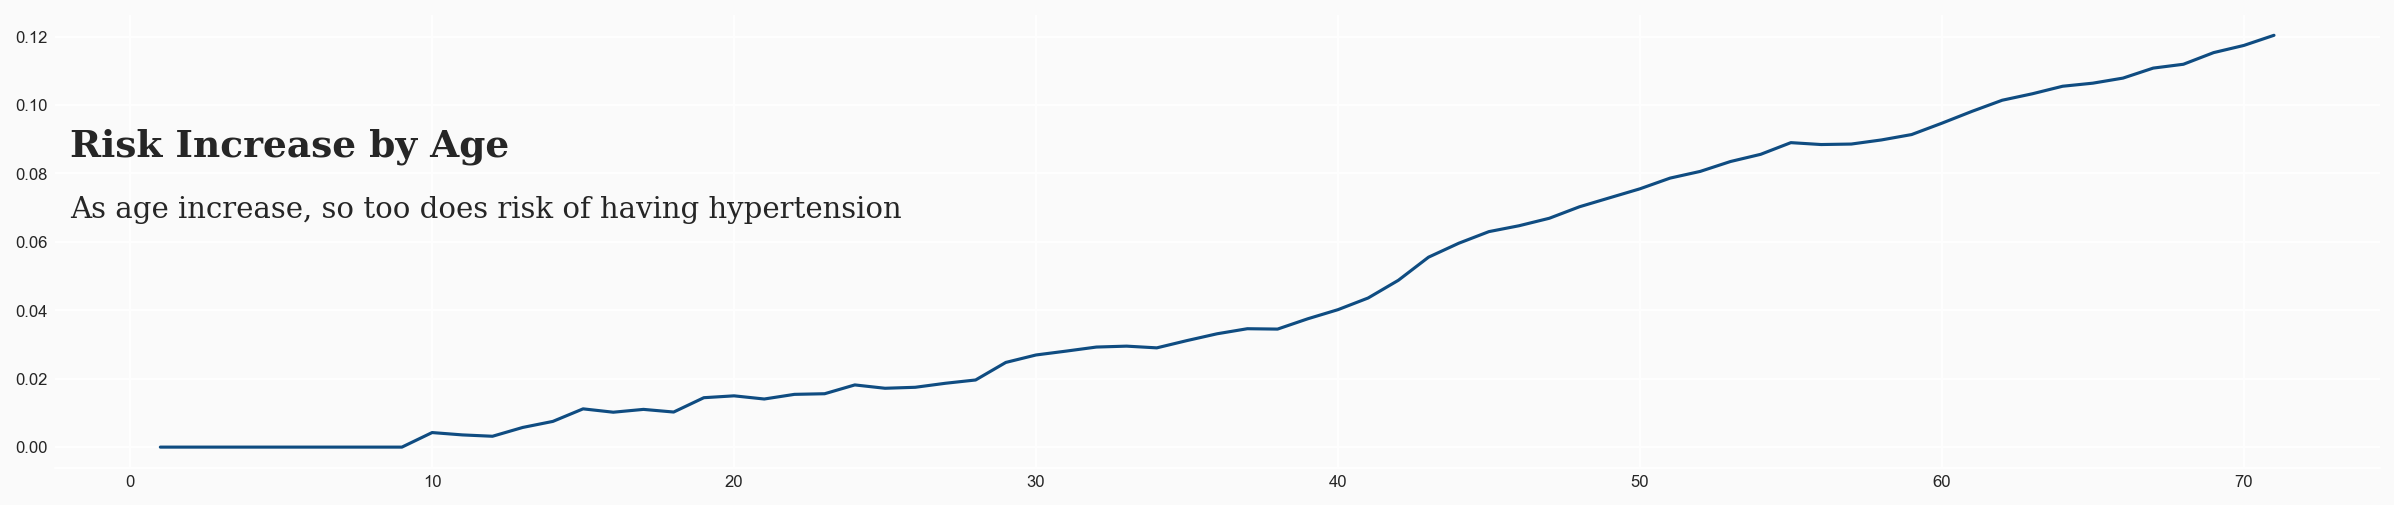

In [29]:
background_color = "#fafafa"
fig = plt.figure(figsize=(20, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['hypertension'].sum() / len(df[df['age'] < i]['hypertension']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-2,0.085,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-2,0.067,'As age increase, so too does risk of having hypertension',fontsize=14,fontfamily='serif')


plt.show()

Distribuion plot of BMI

In [30]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['#1f77b4']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

Remove Other Gender since it is very little

In [31]:
df["gender"].value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

In [32]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3565 non-null   int64  
 1   gender              3565 non-null   object 
 2   age                 3565 non-null   int64  
 3   hypertension        3565 non-null   int64  
 4   heart_disease       3565 non-null   int64  
 5   ever_married        3565 non-null   object 
 6   work_type           3565 non-null   object 
 7   Residence_type      3565 non-null   object 
 8   avg_glucose_level   3565 non-null   float64
 9   bmi                 3565 non-null   float64
 10  smoking_status      3565 non-null   object 
 11  stroke              3565 non-null   int64  
 12  gender_Cat          3565 non-null   int64  
 13  married_Cat         3565 non-null   int64  
 14  worktype_Cat        3565 non-null   int64  
 15  Residence_type_Cat  3565 non-null   int64  
 16  smokin

In [33]:
df['hypertension'].value_counts()

0    3119
1     446
Name: hypertension, dtype: int64

we have an imbalanced data. Standard ML methods, such as Decision Tree and Logistic Regression, tend to deviate from the majority class and tend to ignore the minority class. They tend to only predict the majority class, hence have a significant misclassification of the minority class as compared to the majority class.

So, we should to do SMOTE (Synthetic Minority Over-sampling Technique) - one of the most commonly used resampling techniques to solve the imbalance problem.

<a id='3'></a>
<div>
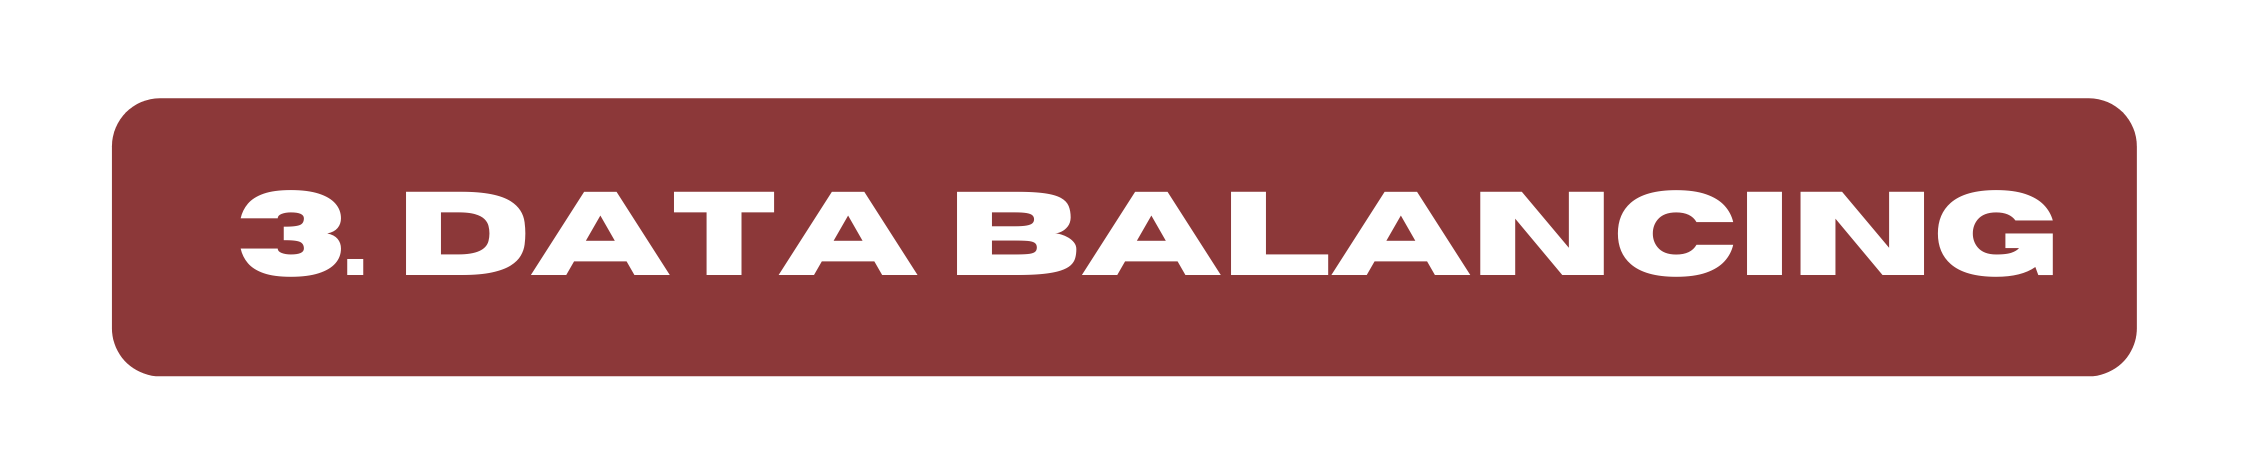
</div>

# SMOTE

In [34]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3565 non-null   int64  
 1   gender              3565 non-null   object 
 2   age                 3565 non-null   int64  
 3   hypertension        3565 non-null   int64  
 4   heart_disease       3565 non-null   int64  
 5   ever_married        3565 non-null   object 
 6   work_type           3565 non-null   object 
 7   Residence_type      3565 non-null   object 
 8   avg_glucose_level   3565 non-null   float64
 9   bmi                 3565 non-null   float64
 10  smoking_status      3565 non-null   object 
 11  stroke              3565 non-null   int64  
 12  gender_Cat          3565 non-null   int64  
 13  married_Cat         3565 non-null   int64  
 14  worktype_Cat        3565 non-null   int64  
 15  Residence_type_Cat  3565 non-null   int64  
 16  smokin

In [35]:
from imblearn.over_sampling import SMOTE
X=df1.copy().drop(['hypertension','id', 'gender','ever_married', 'work_type','Residence_type','smoking_status'],axis=1)
y=df1['hypertension']
smote = SMOTE()

X_balanced, X_test, Y_balanced, y_test = train_test_split(X,y, test_size = 0.2)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_balanced, Y_balanced)

X_train_balanced_list=X_train_balanced.columns.values.tolist()

print(X_train_balanced_list)

['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Cat', 'married_Cat', 'worktype_Cat', 'Residence_type_Cat', 'smoking_status_Cat']


In [36]:
X_train_balanced.shape

(4992, 10)

In [37]:
from collections import Counter
print(Counter(Y_train_balanced))
print(Counter(y_test))

Counter({0: 2496, 1: 2496})
Counter({0: 623, 1: 90})


In [38]:
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4992 non-null   int64  
 1   heart_disease       4992 non-null   int64  
 2   avg_glucose_level   4992 non-null   float64
 3   bmi                 4992 non-null   float64
 4   stroke              4992 non-null   int64  
 5   gender_Cat          4992 non-null   int64  
 6   married_Cat         4992 non-null   int64  
 7   worktype_Cat        4992 non-null   int64  
 8   Residence_type_Cat  4992 non-null   int64  
 9   smoking_status_Cat  4992 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 390.1 KB


In [39]:
from sklearn.decomposition import PCA
class sampling():
    
    def __init__(self,feat,tar,method,ax): 
        self.feat = feat
        self.tar = tar
        self.method = method
        self.ax = ax
    
        
    # under sampling visualization

    def visualize_data(self):
        
        temp_y = pd.DataFrame({'y':self.tar})
        
        # dimension reduction
        pca = PCA(n_components= 2).fit_transform(self.feat)
        
        self.ax.set_facecolor('#f5f6f6')
        # plotting4
        self.ax.scatter(pca[temp_y['y'] == 0][:,0], pca[temp_y['y'] == 0][:,1], c = '#512b58', s = 10)
        self.ax.scatter(pca[temp_y['y'] == 1][:,0], pca[temp_y['y'] == 1][:,1], c = '#ff005c', s =10)
        
        for loc in ['left','right','top', 'bottom']:
            self.ax.spines[loc].set_visible(False)
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)
        self.ax.set_xticklabels('')
        self.ax.set_yticklabels('')
        self.ax.set_xlim(xmin = -6, xmax = 6)
        self.ax.set_ylim(ymin = -5, ymax = 6)

    
        self.ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#ff005c')
        self.ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
        self.ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#512b58')
        self.ax.text(-6,5.5,self.method, {'font': 'serif', 'weight': 'bold', 'size': 20}, alpha = 0.8)
        self.ax.text(-6,4.5,'{} contain {} number of datapoint, \nand targets distribution as {}.'.format(self.method,len(self.feat), {0:Counter(self.tar)[0],1:Counter(self.tar)[1]}), {'font': 'serif', 'weight': 'normal', 'size': 12}, alpha = 0.7)
        

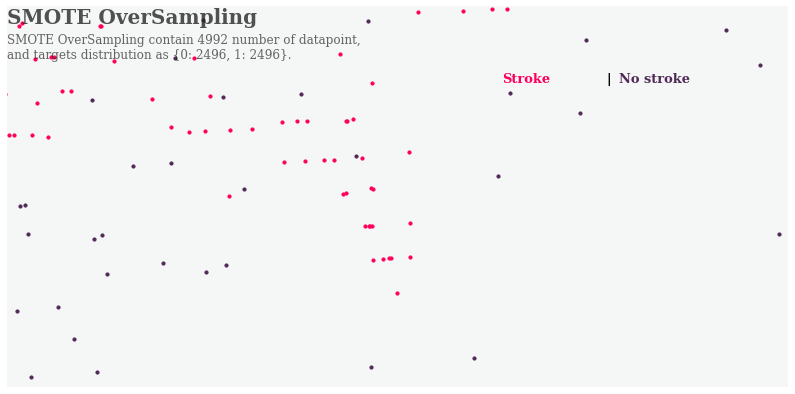

In [40]:
fig = plt.figure(figsize =(14,7))
gs = fig.add_gridspec(1,1)
gs.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(gs[0,0])
axes = [ax1]
sampling(X_train_balanced, Y_train_balanced,'SMOTE OverSampling',ax=ax1).visualize_data() 

<a id='4'></a>
<div>
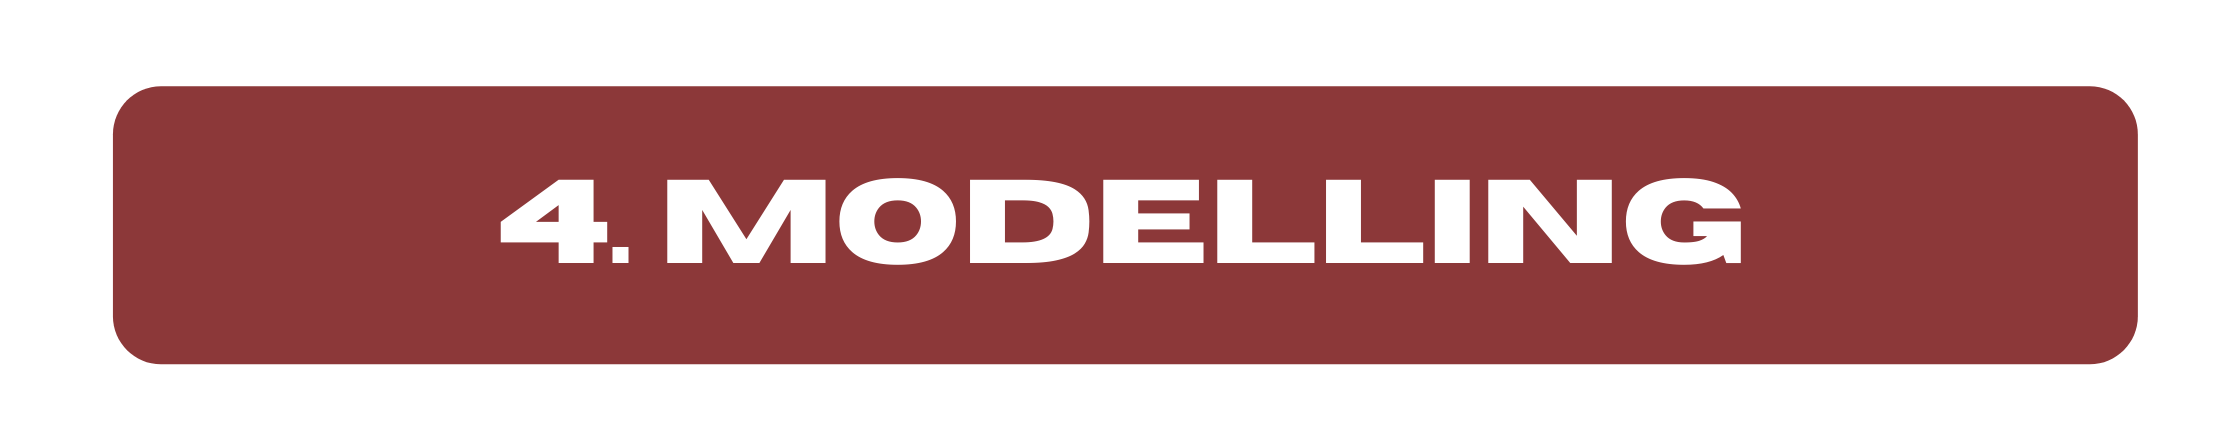
</div>

<a id='4.1'></a>
<div>
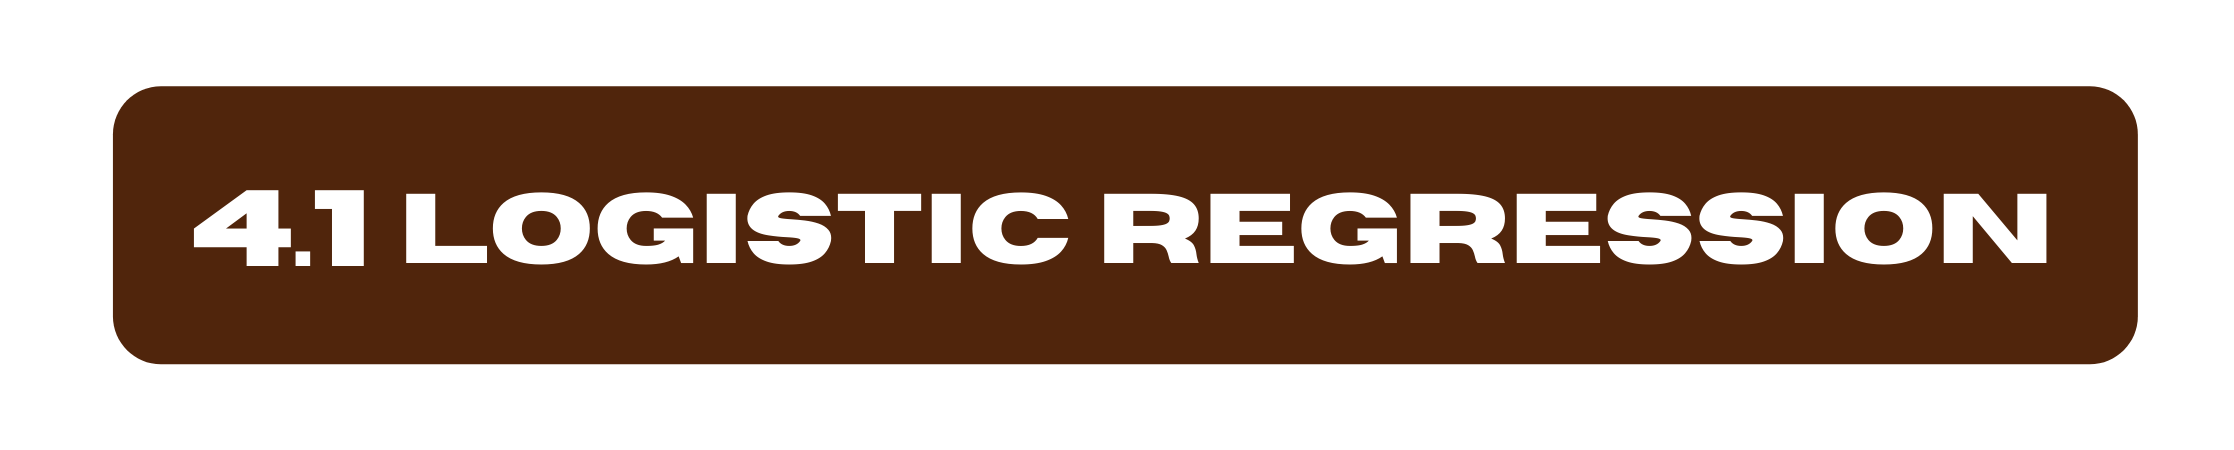
</div>

# Logistic Regression

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=600)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df = pd.DataFrame(features)
rfe_df
# got issues adding in the feature importance coefficients into the dataframe model.estimator_.coeff_

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                5
1       heart_disease              False                4
2   avg_glucose_level              False                7
3                 bmi              False                6
4              stroke              False                3
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                2
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

In [42]:
fit1 = model.fit(X_train_balanced, Y_train_balanced)
y_pred1 = fit1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       623
           1       0.21      0.49      0.30        90

    accuracy                           0.71       713
   macro avg       0.56      0.61      0.56       713
weighted avg       0.82      0.71      0.75       713



In [43]:
y_pred = fit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.55      0.67       623
           1       0.12      0.44      0.19        90

    accuracy                           0.54       713
   macro avg       0.50      0.50      0.43       713
weighted avg       0.78      0.54      0.61       713



<AxesSubplot:>

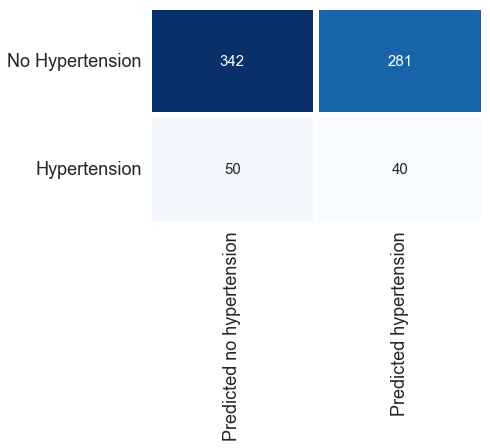

In [44]:
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<a id='4.2'></a>
<div>
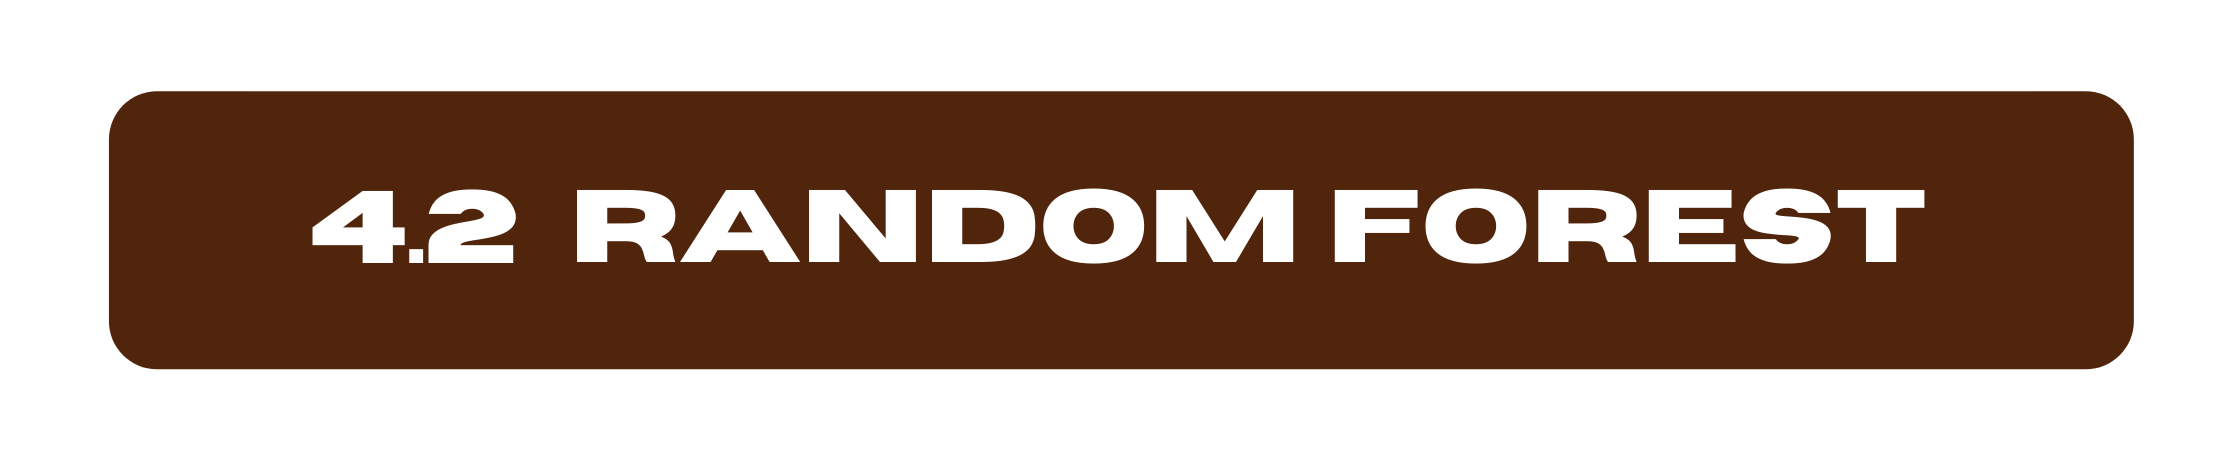
</div>

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train_balanced, Y_train_balanced)


RandomForestClassifier(n_estimators=10)

In [46]:
rfe2 = RFE(estimator=model, n_features_to_select=4)
fit2 = rfe2.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df2 = pd.DataFrame(features)
rfe_df2

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                5
1       heart_disease              False                4
2   avg_glucose_level              False                7
3                 bmi              False                6
4              stroke              False                3
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                2
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

In [47]:
y_pred1 = fit2.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       623
           1       0.16      0.24      0.19        90

    accuracy                           0.74       713
   macro avg       0.52      0.53      0.52       713
weighted avg       0.79      0.74      0.76       713



In [48]:
model.score(X_test, y_test)

0.7741935483870968

In [49]:
y_pred=model.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       623
           1       0.22      0.30      0.25        90

    accuracy                           0.77       713
   macro avg       0.55      0.57      0.56       713
weighted avg       0.81      0.77      0.79       713



<AxesSubplot:>

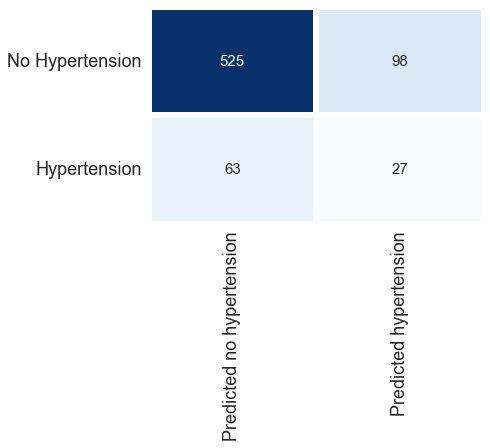

In [51]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


<a id='4.3'></a>
<div>
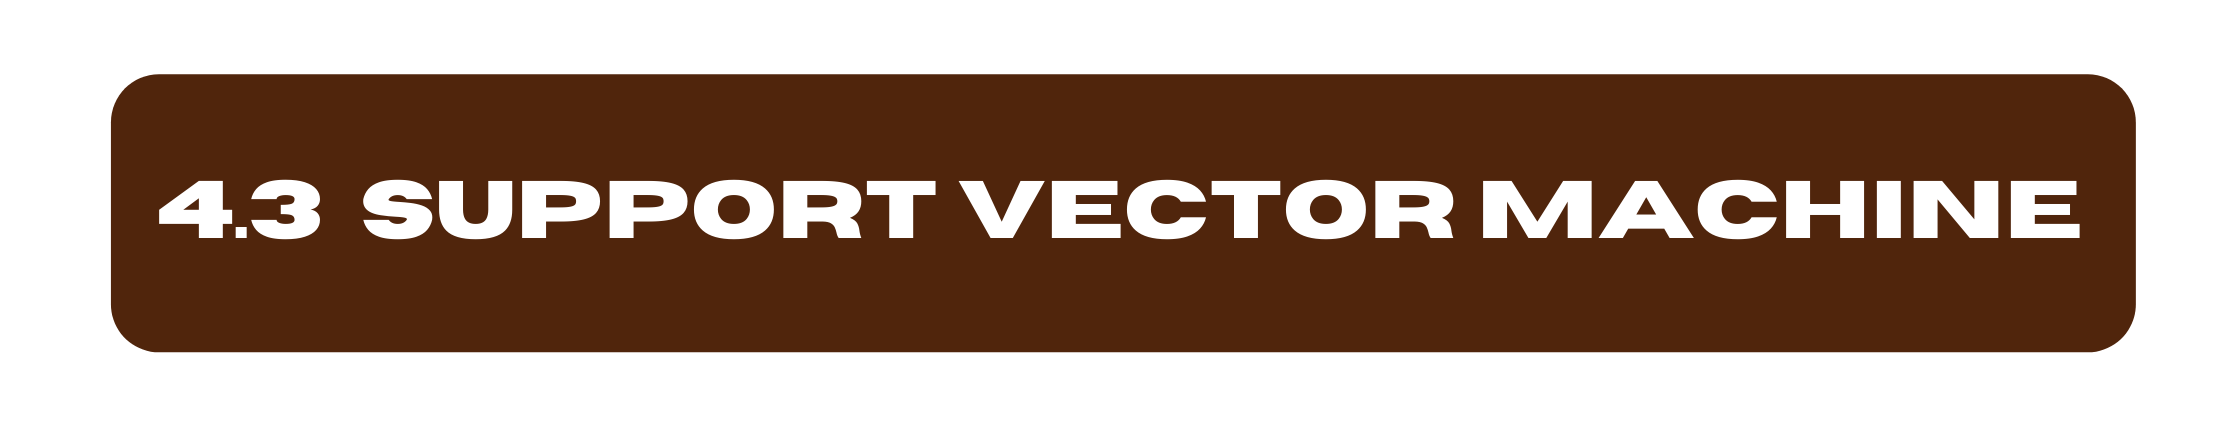
</div>

# Support Vector Machine

In [52]:
svc = SVC()
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73       623
           1       0.21      0.74      0.33        90

    accuracy                           0.61       713
   macro avg       0.58      0.67      0.53       713
weighted avg       0.85      0.61      0.68       713



<AxesSubplot:>

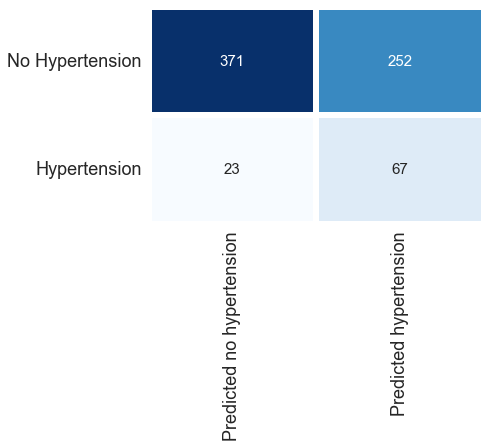

In [53]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<a id='4.4'></a>
<div>
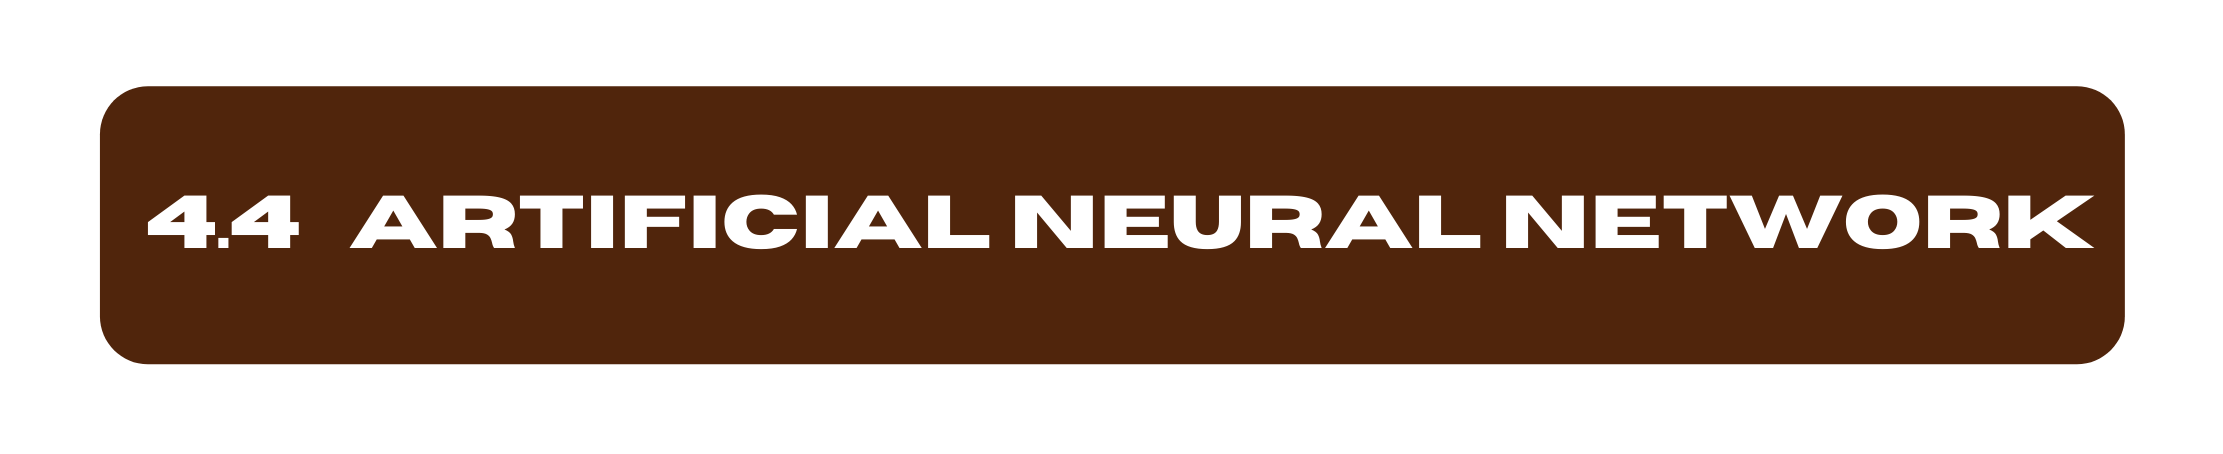
</div>

# Artificial Neural Network

In [54]:
import tensorflow as tf
from tensorflow import keras

#the line below fixes kernal appears to have died problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [55]:
dropout = 0.1
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_balanced.shape[-1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(dropout),         
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0

In [57]:

history1 = model.fit(X_train_balanced, Y_train_balanced, epochs=1000, batch_size=X_train_balanced.size//200, verbose=2, 
                      validation_data=(X_test, y_test))


Train on 4992 samples, validate on 713 samples
Epoch 1/1000
4992/4992 - 1s - loss: 2.9019 - accuracy: 0.5080 - val_loss: 0.8339 - val_accuracy: 0.3043
Epoch 2/1000
4992/4992 - 0s - loss: 0.7270 - accuracy: 0.5274 - val_loss: 0.6350 - val_accuracy: 0.8738
Epoch 3/1000
4992/4992 - 0s - loss: 0.6888 - accuracy: 0.5411 - val_loss: 0.6891 - val_accuracy: 0.6957
Epoch 4/1000
4992/4992 - 0s - loss: 0.6866 - accuracy: 0.5501 - val_loss: 0.6851 - val_accuracy: 0.6886
Epoch 5/1000
4992/4992 - 0s - loss: 0.6778 - accuracy: 0.5833 - val_loss: 0.6402 - val_accuracy: 0.7560
Epoch 6/1000
4992/4992 - 0s - loss: 0.6703 - accuracy: 0.5811 - val_loss: 0.6558 - val_accuracy: 0.6606
Epoch 7/1000
4992/4992 - 0s - loss: 0.6608 - accuracy: 0.6082 - val_loss: 0.6352 - val_accuracy: 0.6634
Epoch 8/1000
4992/4992 - 0s - loss: 0.6650 - accuracy: 0.6034 - val_loss: 0.5688 - val_accuracy: 0.7644
Epoch 9/1000
4992/4992 - 0s - loss: 0.6501 - accuracy: 0.6228 - val_loss: 0.5657 - val_accuracy: 0.7377
Epoch 10/1000
499

4992/4992 - 0s - loss: 0.5198 - accuracy: 0.7492 - val_loss: 0.5170 - val_accuracy: 0.7195
Epoch 78/1000
4992/4992 - 0s - loss: 0.5080 - accuracy: 0.7586 - val_loss: 0.6245 - val_accuracy: 0.6480
Epoch 79/1000
4992/4992 - 0s - loss: 0.5188 - accuracy: 0.7486 - val_loss: 0.4979 - val_accuracy: 0.7700
Epoch 80/1000
4992/4992 - 0s - loss: 0.5363 - accuracy: 0.7338 - val_loss: 0.5970 - val_accuracy: 0.6774
Epoch 81/1000
4992/4992 - 0s - loss: 0.5265 - accuracy: 0.7416 - val_loss: 0.5244 - val_accuracy: 0.7447
Epoch 82/1000
4992/4992 - 0s - loss: 0.5460 - accuracy: 0.7302 - val_loss: 0.6491 - val_accuracy: 0.6718
Epoch 83/1000
4992/4992 - 0s - loss: 0.5380 - accuracy: 0.7342 - val_loss: 0.6137 - val_accuracy: 0.6676
Epoch 84/1000
4992/4992 - 0s - loss: 0.5913 - accuracy: 0.7059 - val_loss: 0.6056 - val_accuracy: 0.7097
Epoch 85/1000
4992/4992 - 0s - loss: 0.5610 - accuracy: 0.7234 - val_loss: 0.5618 - val_accuracy: 0.7475
Epoch 86/1000
4992/4992 - 0s - loss: 0.5649 - accuracy: 0.7288 - val_

Epoch 155/1000
4992/4992 - 0s - loss: 0.5176 - accuracy: 0.7500 - val_loss: 0.4901 - val_accuracy: 0.7574
Epoch 156/1000
4992/4992 - 0s - loss: 0.5239 - accuracy: 0.7468 - val_loss: 0.4964 - val_accuracy: 0.7405
Epoch 157/1000
4992/4992 - 0s - loss: 0.5244 - accuracy: 0.7520 - val_loss: 0.4928 - val_accuracy: 0.7658
Epoch 158/1000
4992/4992 - 0s - loss: 0.5078 - accuracy: 0.7644 - val_loss: 0.4962 - val_accuracy: 0.7630
Epoch 159/1000
4992/4992 - 0s - loss: 0.5228 - accuracy: 0.7492 - val_loss: 0.4801 - val_accuracy: 0.7686
Epoch 160/1000
4992/4992 - 0s - loss: 0.5081 - accuracy: 0.7590 - val_loss: 0.4412 - val_accuracy: 0.7854
Epoch 161/1000
4992/4992 - 0s - loss: 0.5145 - accuracy: 0.7570 - val_loss: 0.5189 - val_accuracy: 0.7433
Epoch 162/1000
4992/4992 - 0s - loss: 0.5201 - accuracy: 0.7526 - val_loss: 0.4829 - val_accuracy: 0.7489
Epoch 163/1000
4992/4992 - 0s - loss: 0.5141 - accuracy: 0.7554 - val_loss: 0.4926 - val_accuracy: 0.7475
Epoch 164/1000
4992/4992 - 0s - loss: 0.5159 -

Epoch 233/1000
4992/4992 - 0s - loss: 0.5064 - accuracy: 0.7584 - val_loss: 0.4698 - val_accuracy: 0.7812
Epoch 234/1000
4992/4992 - 0s - loss: 0.5039 - accuracy: 0.7712 - val_loss: 0.5203 - val_accuracy: 0.7433
Epoch 235/1000
4992/4992 - 0s - loss: 0.5021 - accuracy: 0.7682 - val_loss: 0.4653 - val_accuracy: 0.7854
Epoch 236/1000
4992/4992 - 0s - loss: 0.5041 - accuracy: 0.7660 - val_loss: 0.4260 - val_accuracy: 0.8177
Epoch 237/1000
4992/4992 - 0s - loss: 0.5129 - accuracy: 0.7568 - val_loss: 0.4501 - val_accuracy: 0.8065
Epoch 238/1000
4992/4992 - 0s - loss: 0.5116 - accuracy: 0.7594 - val_loss: 0.5068 - val_accuracy: 0.7504
Epoch 239/1000
4992/4992 - 0s - loss: 0.5134 - accuracy: 0.7558 - val_loss: 0.5700 - val_accuracy: 0.7069
Epoch 240/1000
4992/4992 - 0s - loss: 0.5304 - accuracy: 0.7466 - val_loss: 0.5216 - val_accuracy: 0.7265
Epoch 241/1000
4992/4992 - 0s - loss: 0.5184 - accuracy: 0.7490 - val_loss: 0.4557 - val_accuracy: 0.7770
Epoch 242/1000
4992/4992 - 0s - loss: 0.5092 -

Epoch 311/1000
4992/4992 - 0s - loss: 0.4973 - accuracy: 0.7684 - val_loss: 0.5026 - val_accuracy: 0.7630
Epoch 312/1000
4992/4992 - 0s - loss: 0.5114 - accuracy: 0.7570 - val_loss: 0.4751 - val_accuracy: 0.7896
Epoch 313/1000
4992/4992 - 0s - loss: 0.5037 - accuracy: 0.7672 - val_loss: 0.4815 - val_accuracy: 0.7756
Epoch 314/1000
4992/4992 - 0s - loss: 0.5052 - accuracy: 0.7612 - val_loss: 0.4733 - val_accuracy: 0.7882
Epoch 315/1000
4992/4992 - 0s - loss: 0.5036 - accuracy: 0.7676 - val_loss: 0.5520 - val_accuracy: 0.7181
Epoch 316/1000
4992/4992 - 0s - loss: 0.5191 - accuracy: 0.7634 - val_loss: 0.5066 - val_accuracy: 0.7672
Epoch 317/1000
4992/4992 - 0s - loss: 0.5128 - accuracy: 0.7580 - val_loss: 0.4649 - val_accuracy: 0.7742
Epoch 318/1000
4992/4992 - 0s - loss: 0.5035 - accuracy: 0.7600 - val_loss: 0.5168 - val_accuracy: 0.7377
Epoch 319/1000
4992/4992 - 0s - loss: 0.5134 - accuracy: 0.7584 - val_loss: 0.5361 - val_accuracy: 0.7167
Epoch 320/1000
4992/4992 - 0s - loss: 0.5074 -

Epoch 389/1000
4992/4992 - 0s - loss: 0.5449 - accuracy: 0.7324 - val_loss: 0.5227 - val_accuracy: 0.7335
Epoch 390/1000
4992/4992 - 0s - loss: 0.5366 - accuracy: 0.7384 - val_loss: 0.4771 - val_accuracy: 0.7882
Epoch 391/1000
4992/4992 - 0s - loss: 0.5456 - accuracy: 0.7348 - val_loss: 0.5415 - val_accuracy: 0.7433
Epoch 392/1000
4992/4992 - 0s - loss: 0.5400 - accuracy: 0.7286 - val_loss: 0.5225 - val_accuracy: 0.7489
Epoch 393/1000
4992/4992 - 0s - loss: 0.5366 - accuracy: 0.7416 - val_loss: 0.4108 - val_accuracy: 0.8275
Epoch 394/1000
4992/4992 - 0s - loss: 0.5502 - accuracy: 0.7344 - val_loss: 0.5553 - val_accuracy: 0.7139
Epoch 395/1000
4992/4992 - 0s - loss: 0.5326 - accuracy: 0.7406 - val_loss: 0.4256 - val_accuracy: 0.8149
Epoch 396/1000
4992/4992 - 0s - loss: 0.5322 - accuracy: 0.7304 - val_loss: 0.4677 - val_accuracy: 0.7854
Epoch 397/1000
4992/4992 - 0s - loss: 0.5516 - accuracy: 0.7151 - val_loss: 0.4423 - val_accuracy: 0.7588
Epoch 398/1000
4992/4992 - 0s - loss: 0.5313 -

Epoch 467/1000
4992/4992 - 0s - loss: 0.5116 - accuracy: 0.7542 - val_loss: 0.4505 - val_accuracy: 0.7784
Epoch 468/1000
4992/4992 - 0s - loss: 0.5420 - accuracy: 0.7406 - val_loss: 0.5249 - val_accuracy: 0.7237
Epoch 469/1000
4992/4992 - 0s - loss: 0.5211 - accuracy: 0.7576 - val_loss: 0.5409 - val_accuracy: 0.7111
Epoch 470/1000
4992/4992 - 0s - loss: 0.5187 - accuracy: 0.7518 - val_loss: 0.4827 - val_accuracy: 0.7461
Epoch 471/1000
4992/4992 - 0s - loss: 0.5067 - accuracy: 0.7602 - val_loss: 0.5077 - val_accuracy: 0.7335
Epoch 472/1000
4992/4992 - 0s - loss: 0.5060 - accuracy: 0.7630 - val_loss: 0.4800 - val_accuracy: 0.7574
Epoch 473/1000
4992/4992 - 0s - loss: 0.5101 - accuracy: 0.7706 - val_loss: 0.5293 - val_accuracy: 0.7167
Epoch 474/1000
4992/4992 - 0s - loss: 0.5153 - accuracy: 0.7548 - val_loss: 0.4872 - val_accuracy: 0.7237
Epoch 475/1000
4992/4992 - 0s - loss: 0.5093 - accuracy: 0.7612 - val_loss: 0.5307 - val_accuracy: 0.7139
Epoch 476/1000
4992/4992 - 0s - loss: 0.5050 -

Epoch 545/1000
4992/4992 - 0s - loss: 0.5187 - accuracy: 0.7422 - val_loss: 0.4765 - val_accuracy: 0.7742
Epoch 546/1000
4992/4992 - 0s - loss: 0.5208 - accuracy: 0.7452 - val_loss: 0.4922 - val_accuracy: 0.7377
Epoch 547/1000
4992/4992 - 0s - loss: 0.5230 - accuracy: 0.7424 - val_loss: 0.5738 - val_accuracy: 0.6620
Epoch 548/1000
4992/4992 - 0s - loss: 0.5328 - accuracy: 0.7390 - val_loss: 0.5588 - val_accuracy: 0.7055
Epoch 549/1000
4992/4992 - 0s - loss: 0.5204 - accuracy: 0.7454 - val_loss: 0.4822 - val_accuracy: 0.7742
Epoch 550/1000
4992/4992 - 0s - loss: 0.5202 - accuracy: 0.7498 - val_loss: 0.4606 - val_accuracy: 0.7896
Epoch 551/1000
4992/4992 - 0s - loss: 0.5246 - accuracy: 0.7424 - val_loss: 0.4970 - val_accuracy: 0.7475
Epoch 552/1000
4992/4992 - 0s - loss: 0.5171 - accuracy: 0.7506 - val_loss: 0.5077 - val_accuracy: 0.7489
Epoch 553/1000
4992/4992 - 0s - loss: 0.5099 - accuracy: 0.7572 - val_loss: 0.4775 - val_accuracy: 0.7602
Epoch 554/1000
4992/4992 - 0s - loss: 0.5248 -

Epoch 623/1000
4992/4992 - 0s - loss: 0.5063 - accuracy: 0.7610 - val_loss: 0.5026 - val_accuracy: 0.7363
Epoch 624/1000
4992/4992 - 0s - loss: 0.5113 - accuracy: 0.7586 - val_loss: 0.4894 - val_accuracy: 0.7546
Epoch 625/1000
4992/4992 - 0s - loss: 0.5100 - accuracy: 0.7592 - val_loss: 0.5294 - val_accuracy: 0.7027
Epoch 626/1000
4992/4992 - 0s - loss: 0.5077 - accuracy: 0.7620 - val_loss: 0.5383 - val_accuracy: 0.7321
Epoch 627/1000
4992/4992 - 0s - loss: 0.5110 - accuracy: 0.7602 - val_loss: 0.5524 - val_accuracy: 0.6957
Epoch 628/1000
4992/4992 - 0s - loss: 0.5047 - accuracy: 0.7572 - val_loss: 0.4985 - val_accuracy: 0.7532
Epoch 629/1000
4992/4992 - 0s - loss: 0.5044 - accuracy: 0.7620 - val_loss: 0.4730 - val_accuracy: 0.7686
Epoch 630/1000
4992/4992 - 0s - loss: 0.5062 - accuracy: 0.7648 - val_loss: 0.4818 - val_accuracy: 0.7602
Epoch 631/1000
4992/4992 - 0s - loss: 0.5033 - accuracy: 0.7626 - val_loss: 0.4948 - val_accuracy: 0.7532
Epoch 632/1000
4992/4992 - 0s - loss: 0.5112 -

Epoch 701/1000
4992/4992 - 0s - loss: 0.5195 - accuracy: 0.7492 - val_loss: 0.4781 - val_accuracy: 0.7630
Epoch 702/1000
4992/4992 - 0s - loss: 0.5197 - accuracy: 0.7494 - val_loss: 0.4566 - val_accuracy: 0.7826
Epoch 703/1000
4992/4992 - 0s - loss: 0.5165 - accuracy: 0.7508 - val_loss: 0.5432 - val_accuracy: 0.7111
Epoch 704/1000
4992/4992 - 0s - loss: 0.5218 - accuracy: 0.7446 - val_loss: 0.5270 - val_accuracy: 0.7111
Epoch 705/1000
4992/4992 - 0s - loss: 0.5201 - accuracy: 0.7386 - val_loss: 0.4913 - val_accuracy: 0.7756
Epoch 706/1000
4992/4992 - 0s - loss: 0.5198 - accuracy: 0.7430 - val_loss: 0.4022 - val_accuracy: 0.8219
Epoch 707/1000
4992/4992 - 0s - loss: 0.5485 - accuracy: 0.7137 - val_loss: 0.4330 - val_accuracy: 0.8079
Epoch 708/1000
4992/4992 - 0s - loss: 0.5222 - accuracy: 0.7410 - val_loss: 0.4509 - val_accuracy: 0.7868
Epoch 709/1000
4992/4992 - 0s - loss: 0.5210 - accuracy: 0.7458 - val_loss: 0.5406 - val_accuracy: 0.7363
Epoch 710/1000
4992/4992 - 0s - loss: 0.5257 -

Epoch 779/1000
4992/4992 - 0s - loss: 0.5342 - accuracy: 0.7402 - val_loss: 0.5106 - val_accuracy: 0.7335
Epoch 780/1000
4992/4992 - 0s - loss: 0.5189 - accuracy: 0.7472 - val_loss: 0.4583 - val_accuracy: 0.7966
Epoch 781/1000
4992/4992 - 0s - loss: 0.5175 - accuracy: 0.7470 - val_loss: 0.5615 - val_accuracy: 0.7111
Epoch 782/1000
4992/4992 - 0s - loss: 0.5450 - accuracy: 0.7290 - val_loss: 0.5360 - val_accuracy: 0.7321
Epoch 783/1000
4992/4992 - 0s - loss: 0.5310 - accuracy: 0.7460 - val_loss: 0.4777 - val_accuracy: 0.7854
Epoch 784/1000
4992/4992 - 0s - loss: 0.5261 - accuracy: 0.7454 - val_loss: 0.4359 - val_accuracy: 0.7938
Epoch 785/1000
4992/4992 - 0s - loss: 0.5131 - accuracy: 0.7494 - val_loss: 0.4422 - val_accuracy: 0.8022
Epoch 786/1000
4992/4992 - 0s - loss: 0.5238 - accuracy: 0.7444 - val_loss: 0.4716 - val_accuracy: 0.7546
Epoch 787/1000
4992/4992 - 0s - loss: 0.5230 - accuracy: 0.7492 - val_loss: 0.5016 - val_accuracy: 0.7700
Epoch 788/1000
4992/4992 - 0s - loss: 0.5209 -

Epoch 857/1000
4992/4992 - 0s - loss: 0.5453 - accuracy: 0.7302 - val_loss: 0.5808 - val_accuracy: 0.6480
Epoch 858/1000
4992/4992 - 0s - loss: 0.5569 - accuracy: 0.7188 - val_loss: 0.5742 - val_accuracy: 0.6732
Epoch 859/1000
4992/4992 - 0s - loss: 0.5428 - accuracy: 0.7258 - val_loss: 0.4941 - val_accuracy: 0.7658
Epoch 860/1000
4992/4992 - 0s - loss: 0.5343 - accuracy: 0.7378 - val_loss: 0.4966 - val_accuracy: 0.7630
Epoch 861/1000
4992/4992 - 0s - loss: 0.5375 - accuracy: 0.7426 - val_loss: 0.4997 - val_accuracy: 0.7826
Epoch 862/1000
4992/4992 - 0s - loss: 0.5330 - accuracy: 0.7386 - val_loss: 0.4962 - val_accuracy: 0.7854
Epoch 863/1000
4992/4992 - 0s - loss: 0.5266 - accuracy: 0.7506 - val_loss: 0.4757 - val_accuracy: 0.8065
Epoch 864/1000
4992/4992 - 0s - loss: 0.5321 - accuracy: 0.7438 - val_loss: 0.4869 - val_accuracy: 0.7966
Epoch 865/1000
4992/4992 - 0s - loss: 0.5328 - accuracy: 0.7444 - val_loss: 0.4788 - val_accuracy: 0.7882
Epoch 866/1000
4992/4992 - 0s - loss: 0.5314 -

Epoch 935/1000
4992/4992 - 0s - loss: 0.5574 - accuracy: 0.7177 - val_loss: 0.4618 - val_accuracy: 0.8022
Epoch 936/1000
4992/4992 - 0s - loss: 0.5561 - accuracy: 0.7238 - val_loss: 0.4457 - val_accuracy: 0.8107
Epoch 937/1000
4992/4992 - 0s - loss: 0.5665 - accuracy: 0.7091 - val_loss: 0.4796 - val_accuracy: 0.7924
Epoch 938/1000
4992/4992 - 0s - loss: 0.5595 - accuracy: 0.7175 - val_loss: 0.4818 - val_accuracy: 0.7812
Epoch 939/1000
4992/4992 - 0s - loss: 0.5498 - accuracy: 0.7185 - val_loss: 0.4612 - val_accuracy: 0.7952
Epoch 940/1000
4992/4992 - 0s - loss: 0.5482 - accuracy: 0.7228 - val_loss: 0.4287 - val_accuracy: 0.8275
Epoch 941/1000
4992/4992 - 0s - loss: 0.5541 - accuracy: 0.7192 - val_loss: 0.4922 - val_accuracy: 0.7714
Epoch 942/1000
4992/4992 - 0s - loss: 0.5479 - accuracy: 0.7272 - val_loss: 0.4941 - val_accuracy: 0.7672
Epoch 943/1000
4992/4992 - 0s - loss: 0.5519 - accuracy: 0.7246 - val_loss: 0.4280 - val_accuracy: 0.8373
Epoch 944/1000
4992/4992 - 0s - loss: 0.5649 -

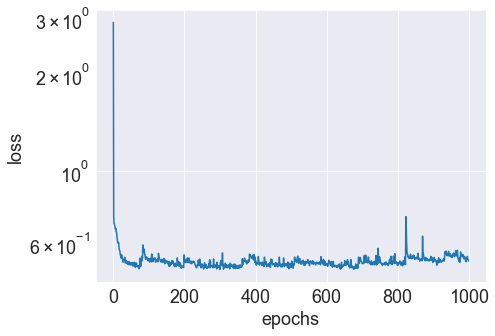

In [58]:
plt.rcParams['figure.figsize'] = 7, 5
grid = sns.lineplot(data = history1.history['loss'])
grid.set(yscale='log')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

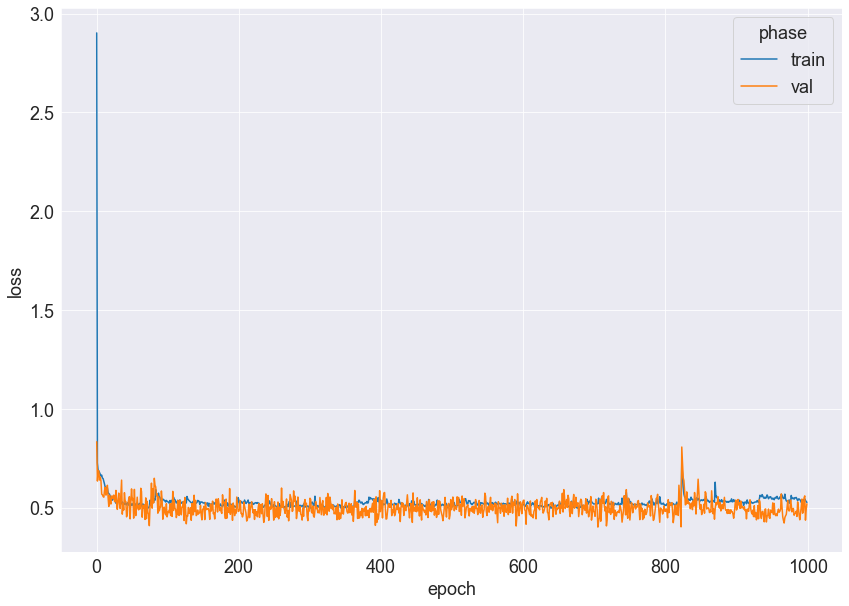

In [59]:

plt.rcParams['figure.figsize'] = 14, 10

df = pd.DataFrame(history1.history)
df['epoch'] = df.index
val_cols = [x for x in df.columns if x.startswith('val')]
df_val = df[val_cols+['epoch']]
df.drop(columns=val_cols, inplace=True)
df_val.rename(columns={col: col.split('val_')[-1] for col in df_val.columns}, inplace=True)
df['phase'] = 'train'
df_val['phase'] = 'val'
hist_df = pd.concat([df, df_val], ignore_index=True)

fig, axes = plt.subplots()

sns.lineplot(data = hist_df, x='epoch', y='loss', hue='phase')

plt.show()


In [60]:
y_pred = model.predict(X_test)
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       623
           1       0.23      0.43      0.30        90

    accuracy                           0.75       713
   macro avg       0.57      0.61      0.58       713
weighted avg       0.82      0.75      0.78       713



<AxesSubplot:>

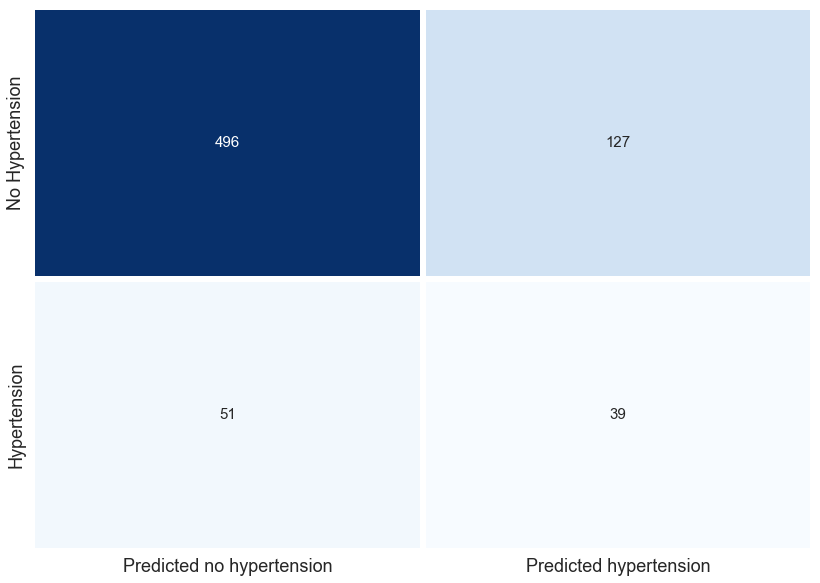

In [61]:
y_pred = model.predict(X_test)
ann_cm = confusion_matrix(y_test, np.around(y_pred))
sns.heatmap(ann_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<a id='4.5'></a>
<div>
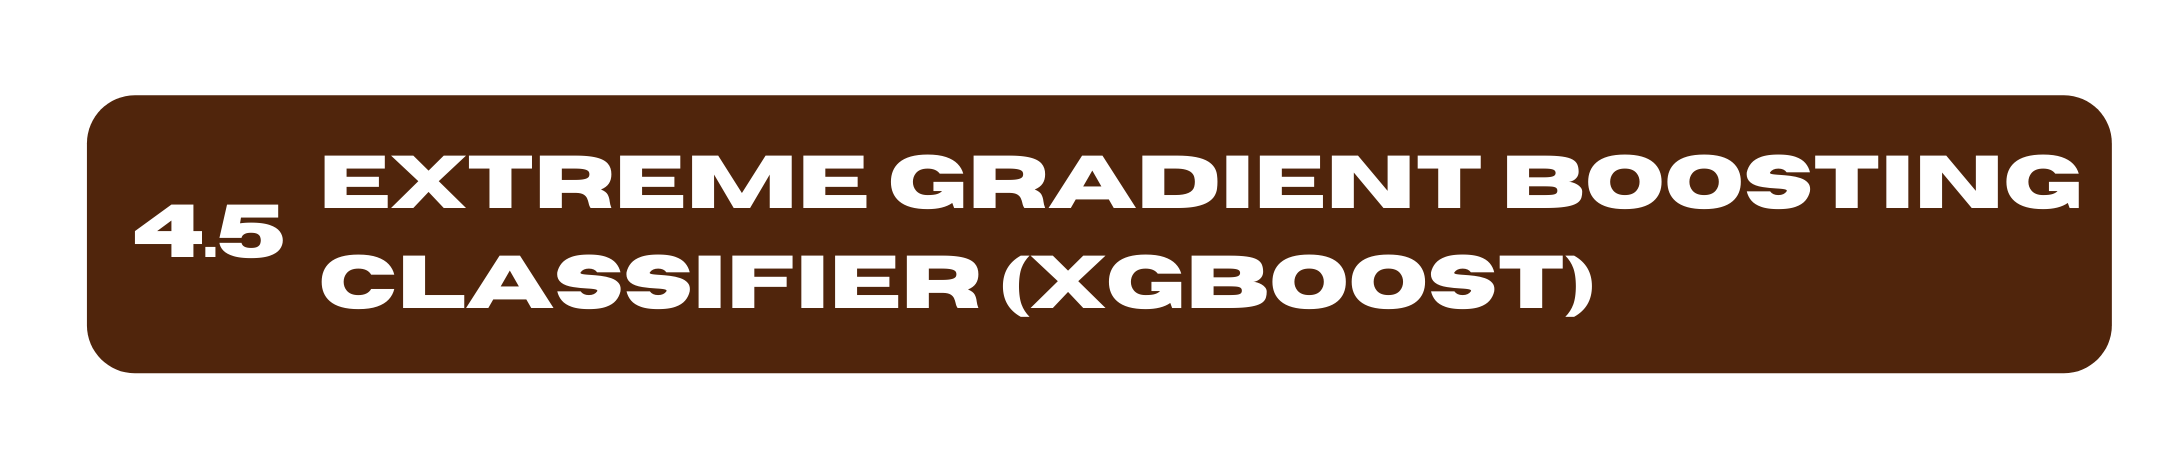
</div>

# eXtreme Gradient Boosting Classifier (XGBoost)

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       623
           1       0.18      0.27      0.21        90

    accuracy                           0.75       713
   macro avg       0.53      0.54      0.53       713
weighted avg       0.80      0.75      0.77       713



In [63]:
rfe3 = RFE(estimator=xgb, n_features_to_select=4)
fit3 = rfe3.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df3 = pd.DataFrame(features)
rfe_df3

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age              False                5
1       heart_disease              False                4
2   avg_glucose_level              False                7
3                 bmi              False                6
4              stroke              False                3
5          gender_Cat               True                1
6         married_Cat               True                1
7        worktype_Cat              False                2
8  Residence_type_Cat               True                1
9  smoking_status_Cat               True                1

In [64]:
y_pred3 = fit3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80       623
           1       0.19      0.47      0.27        90

    accuracy                           0.68       713
   macro avg       0.55      0.59      0.53       713
weighted avg       0.81      0.68      0.73       713



<AxesSubplot:>

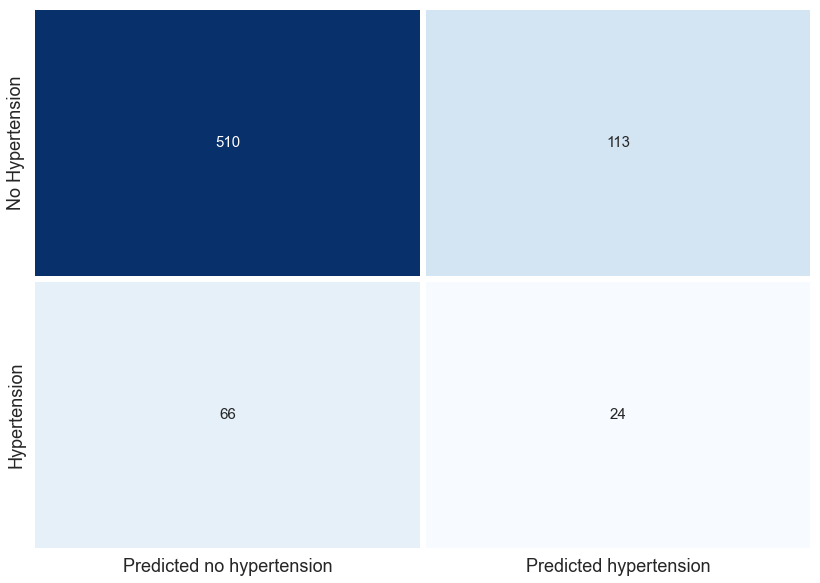

In [65]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

# K nearest Neighbours


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       623
           1       0.18      0.50      0.27        90

    accuracy                           0.65       713
   macro avg       0.54      0.59      0.52       713
weighted avg       0.81      0.65      0.71       713



<AxesSubplot:>

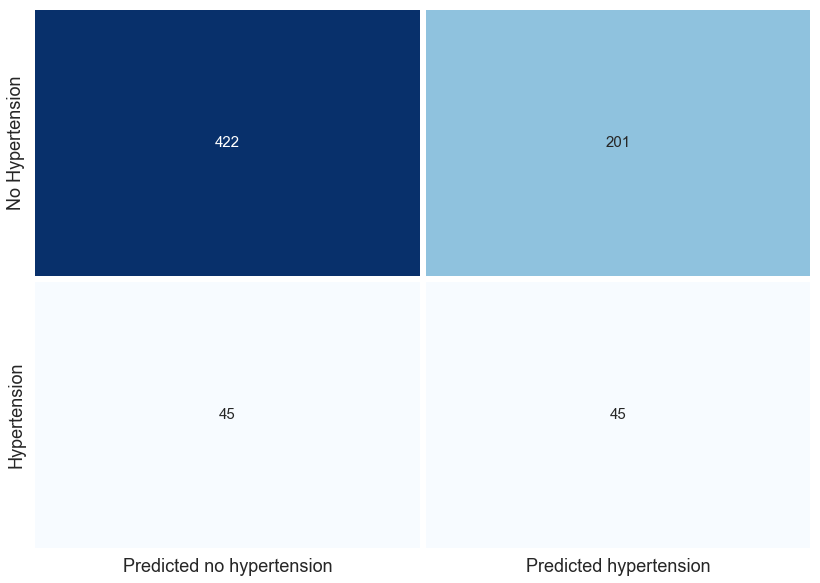

In [67]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<a id='5'></a>
<div>
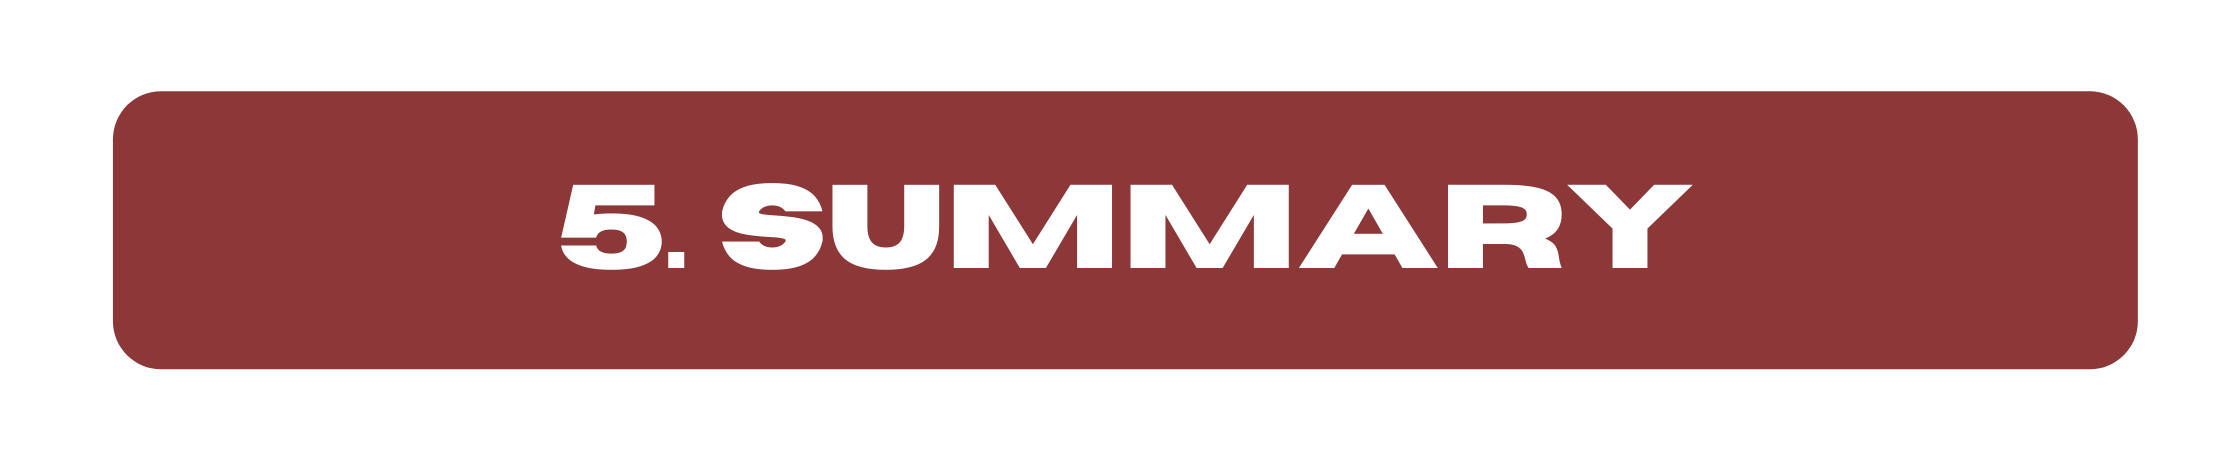
</div>